# Исследование доходности тарифных планов Ultra и Smart

**Цель проекта**

Проанализировать данные о доходности тарифных планов Ultra и Smart и на их основе определить наиболее выгодный тариф для компании, подготовить информацию для принятия решения о корректировке рекламного бюджета. 

**Данные для анализа**

На анализ поступили данные по небольшой выборке абонентов оператора компании «Мегалайн» (500 клиентов), подключеннных к тарифным планам Ultra и Smart. 

Предоставлены 5 файлов с данными:
1. по пользователям: кто они, откуда, каким тарифом пользуются
2. по условиям тарифных планов
3. по отравленным пользователями СМС-сообщеничм
4. по израсходованному пользователями мобильному трафику
5. по совершенным пользователями звонкам

Данные предоставлены за 2018 год.

**Шаги (план) проекта**

1. Шаг 1_Обзор данных
* Таблица users
* Таблица tariffs
* Таблица messages
* Таблица internet
* Таблица calls
2. Шаг 2_Подготовка данных

   2.1  Предобработка данных
   
* Таблица users
* Таблица tariffs
* Таблица messages
* Таблица internet
* Таблица calls

   2.2  Подготовка пользовательских данных
3. Шаг 3_Анализ данных
4. Шаг 4_Проверка гипотез
5. Шаг 5_Вывод

## Шаг 1_Обзор данных

Импортируем библиотеку pandas для работы с данными.

In [1]:
import pandas as pd # импорт библиотеки pandas

In [2]:
import numpy as np # импорт библиотеки numpy для последующего округления данных в бОльшую сторону

In [3]:
import matplotlib.pyplot as plt # импорт библиотеки matplotlib для построения графиков

### Таблица users

Откроем таблицу с данными, выведем первые 10 строк.

In [4]:
# чтение файла с данными и сохранение в df_users 
df_users = pd.read_csv('/datasets/users.csv')
# вывод первых 10 строк
df_users.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


Изучим общую информацию о данных.

In [5]:
df_users.info() # получение общей информации о структуре таблицы df_users

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Таблица содержит 8 столбцов, 500 строк. Наименования столбцов оформлены "змеиным стилем", переименование не требуется. 

В столбцах содержатся данные двух типов:

2 столбца содержат целые числа
6 столбцов содержат строки

Тип данных в столбцах churn_date и reg_date неверный, на следующем шаге потребуется изменить тип данных в столбцах churn_date и reg_date на datetime.

В столбце churn_date отсутствует большое количество значений, на следующем шаге потребуется заменить NaN на 0 для удобства проведения анализа.

Проверим данные на наличие явных дубликатов.

In [6]:
df_users.duplicated().sum() # проверка наличия дубликатов

0

Явные дубликаты в таблице отсутствуют.

### Таблица tariffs

Откроем таблицу с данными, выведем первые строки.

In [7]:
# чтение файла с данными и сохранение в df_tariffs
df_tariffs = pd.read_csv('/datasets/tariffs.csv') 
# вывод первых строк
df_tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Изучим общую информацию о данных.

In [8]:
df_tariffs.info() # получение общей информации о структуре таблицы df_tariffs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Таблица содержит 8 столбцов, 2 строки. Наименования столбцов оформлены "змеиным стилем", переименование не требуется. 

В столбцах содержатся данные двух типов:

7 столбцов содержат целые числа
1 столбец содержит строки

Тип данных в столбцах корректный, пропущенных значений и дубликатов нет.

### Таблица messages

Откроем таблицу с данными, выведем первые 10 строк.

In [9]:
# чтение файла с данными и сохранение в df_messages
df_messages = pd.read_csv('/datasets/messages.csv', parse_dates=['message_date']) 
# вывод первых 10 строк
df_messages.head(10)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


Изучим общую информацию о данных.

In [10]:
df_messages.info() # получение общей информации о структуре таблицы df_messages

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


Таблица содержит 3 столбца, 123 036 строк. Наименования столбцов оформлены "змеиным стилем", переименование не требуется. 

В столбцах содержатся данные двух типов:

1 столбец содержит целые числа
2 столбца содержат строки

Тип данных в столбце message_date неверный, на следующем шаге потребуется изменить тип данных в столбце message_date на datetime.

Пропущенных значений в таблице нет.

Проверим данные на наличие явных дубликатов.

In [11]:
df_messages.duplicated().sum() # проверка наличия дубликатов

0

Явные дубликаты в таблице отсутствуют.

### Таблица internet

Откроем таблицу с данными, выведем первые 10 строк.

In [12]:
# чтение файла с данными и сохранение в df_internet
df_internet = pd.read_csv('/datasets/internet.csv') 
# вывод первых 10 строк
df_internet.head(10)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


In [13]:
df_internet_test = pd.read_csv('/datasets/internet.csv', index_col=0)
df_internet_test.head(10)

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
5,1000_5,399.97,2018-10-02,1000
6,1000_6,540.08,2018-09-07,1000
7,1000_7,415.70,2018-07-11,1000
8,1000_8,505.40,2018-10-08,1000
9,1000_9,345.54,2018-09-03,1000


Изучим общую информацию о данных.

In [14]:
df_internet.info() # получение общей информации о структуре таблицы df_messages

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


Таблица содержит 5 столбцов, 149 396 строк. Наименования столбцов оформлены "змеиным стилем", переименование не требуется. 

В столбцах содержатся данные трех типов:

2 столбца содержат целые числа
2 столбца содержат строки
1 столбец содержит вещественные числа

Колонка 'Unnamed: 0' лишняя, ее потребуется удалить на следующем шаге. Тип данных в столбце session_date неверный, на следующем шаге потребуется изменить тип данных в столбце session_date на datetime.

Пропущенных значений в таблице нет.

Проверим данные на наличие явных дубликатов.

In [15]:
df_internet.duplicated().sum() # проверка наличия дубликатов

0

Явные дубликаты в таблице отсутствую

### Таблица calls

Откроем таблицу с данными, выведем первые 10 строк.

In [16]:
# чтение файла с данными и сохранение в df_calls
df_calls = pd.read_csv('/datasets/calls.csv') 
# вывод первых 10 строк
df_calls.head(10)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


Изучим общую информацию о данных.

In [17]:
df_calls.info() # получение общей информации о структуре таблицы df_calls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Таблица содержит 4 столбца, 202 607 строк. Наименования столбцов оформлены "змеиным стилем", переименование не требуется. 

В столбцах содержатся данные трех типов:

1 столбец содержит целые числа
2 столбца содержат строки
1 столбец содержит вещественные числа

Тип данных в столбце call_date неверный, на следующем шаге потребуется изменить тип данных в столбце call_date на datetime.

Пропущенных значений в таблице нет.

Проверим данные на наличие явных дубликатов.

In [18]:
df_calls.duplicated().sum() # проверка наличия дубликатов

0

Явные дубликаты в таблице отсутствуют.

<div style="border:solid blue 2px; padding: 20px"> 

**Вывод**  

Таблицы открыты, данные адекватны.

Требуется предобработка данных:
    
1. исправление типов данных в колонках с датами во всех таблицах
    
2. удаление лишней колонки "Unnamed: 0" в таблице "df_internet"
    
3. замена отсутствующих значений в таблице "df_users" в колонке "churn_date" на 0 
    
Переименование колонок не требуется.
    
Дубликатов в данных нет.    

</div>

## Шаг 2_Подготовка данных

### Предобработка данных

#### Таблица users

Изменим тип данных в колонках churn_date и reg_date на datetime и заменим Nan на 0 в колонке churn_date.

In [19]:
df_users['churn_date'] = df_users['churn_date'].fillna(0) # замена отсутствующих значений в колонке churn_date на 0

In [20]:
df_users['churn_date'] = pd.to_datetime(df_users['churn_date']) # изменение типа данных в колонке churn_date на datetime

In [21]:
df_users['reg_date'] = pd.to_datetime(df_users['reg_date']) # изменение типа данных в колонке reg_date на datetime

Проверим корректность сделанных изменений.

In [22]:
df_users.info() # вывод информации о таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  500 non-null    datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


Тип данных в колонках churn_date и reg_date изменен, отсутствующих значений в колонке churn_date больше нет.

Проверим, нет ли в ошибок в данных в каждом из столбцов таблицы.

In [23]:
df_users['user_id'].unique() # вывод уникальных значений столбца

array([1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010,
       1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021,
       1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032,
       1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043,
       1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054,
       1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065,
       1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076,
       1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087,
       1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098,
       1099, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109,
       1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120,
       1121, 1122, 1123, 1124, 1125, 1126, 1127, 1128, 1129, 1130, 1131,
       1132, 1133, 1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142,
       1143, 1144, 1145, 1146, 1147, 1148, 1149, 11

In [24]:
df_users['age'].unique() # вывод уникальных значений столбца

array([52, 41, 59, 23, 68, 67, 21, 65, 63, 24, 26, 44, 38, 36, 64, 58, 73,
       71, 61, 72, 42, 56, 32, 62, 20, 51, 28, 66, 31, 37, 47, 40, 69, 48,
       33, 39, 43, 46, 45, 55, 53, 34, 49, 25, 18, 70, 50, 19, 54, 60, 29,
       27, 74, 22, 30, 75, 57, 35])

In [25]:
df_users['churn_date'].unique() # вывод уникальных значений столбца

array(['1970-01-01T00:00:00.000000000', '2018-10-05T00:00:00.000000000',
       '2018-12-18T00:00:00.000000000', '2018-11-21T00:00:00.000000000',
       '2018-10-03T00:00:00.000000000', '2018-10-14T00:00:00.000000000',
       '2018-12-09T00:00:00.000000000', '2018-12-11T00:00:00.000000000',
       '2018-12-26T00:00:00.000000000', '2018-08-31T00:00:00.000000000',
       '2018-12-03T00:00:00.000000000', '2018-12-23T00:00:00.000000000',
       '2018-11-07T00:00:00.000000000', '2018-12-16T00:00:00.000000000',
       '2018-12-20T00:00:00.000000000', '2018-11-30T00:00:00.000000000',
       '2018-12-21T00:00:00.000000000', '2018-08-17T00:00:00.000000000',
       '2018-09-02T00:00:00.000000000', '2018-10-04T00:00:00.000000000',
       '2018-11-13T00:00:00.000000000', '2018-11-22T00:00:00.000000000',
       '2018-10-28T00:00:00.000000000', '2018-11-26T00:00:00.000000000',
       '2018-11-27T00:00:00.000000000', '2018-11-16T00:00:00.000000000',
       '2018-10-27T00:00:00.000000000', '2018-12-30

In [26]:
df_users['city'].unique() # вывод уникальных значений столбца

array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Волжский', 'Курган', 'Барнаул', 'Красноярск', 'Архангельск',
       'Липецк', 'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

In [27]:
df_users['first_name'].unique() # вывод уникальных значений столбца

array(['Рафаил', 'Иван', 'Евгений', 'Белла', 'Татьяна', 'Афанасий',
       'Леонид', 'Юна', 'Рустэм', 'Василиса', 'Эдуард', 'Веселина',
       'Варлам', 'Борис', 'Яков', 'Рузана', 'Марица', 'Мария', 'Матвей',
       'Игнатий', 'Тала', 'Святослав', 'Людмила', 'Иулиан', 'Владислав',
       'Рустем', 'Алексей', 'Мариетта', 'Лаврентий', 'Инна', 'Лия',
       'Розалия', 'Анжелика', 'Изольда', 'Агнесса', 'Юрий', 'Михаил',
       'Константин', 'Марианна', 'Иннокентий', 'Джемма', 'Екатерина',
       'Милица', 'Лола', 'Габриель', 'Кристина', 'Павел', 'Ренальд',
       'Луиза', 'Радислав', 'Динара', 'Лукий', 'Глеб', 'Тамара',
       'Александр', 'Таира', 'Роза', 'Исак', 'Юзефа', 'Ким', 'Гордей',
       'Эльза', 'Гектор', 'Андрей', 'Рафаэль', 'Фёдор', 'Харитон',
       'Еремей', 'Всеволод', 'Софья', 'Авксентий', 'Виолетта', 'Ириней',
       'Гелена', 'Ксения', 'Вера', 'Вениамин', 'Вероника', 'Даниэла',
       'Алла', 'Элеонора', 'Аюна', 'Руслан', 'Онисим', 'Марта', 'Эльвира',
       'Габриэль', '

In [28]:
df_users['last_name'].unique() # вывод уникальных значений столбца

array(['Верещагин', 'Ежов', 'Абрамович', 'Белякова', 'Авдеенко', 'Горлов',
       'Ермолаев', 'Березина', 'Пономарёв', 'Блинова', 'Кононов',
       'Алёшко', 'Соловьев', 'Андреенко', 'Акинфьев', 'Алюшина',
       'Сазонова', 'Аленникова', 'Золотов', 'Круглов', 'Костина',
       'Тихонов', 'Трофимова', 'Мельникова', 'Антипов', 'Акинин',
       'Бородин', 'Авдеев', 'Евсеев', 'Селезнев', 'Русанова', 'Тимофеев',
       'Игнатьева', 'Бабушкина', 'Бондарев', 'Аракина', 'Андропова',
       'Архипова', 'Денисова', 'Одинцов', 'Кравцов', 'Добрынин',
       'Родионова', 'Рябов', 'Карасева', 'Александрова', 'Меркулова',
       'Мясникова', 'Ларин', 'Аничкина', 'Сомова', 'Панов', 'Фёдоров',
       'Платонова', 'Артемьев', 'Дьячкова', 'Глушков', 'Свиридов',
       'Рудаков', 'Ситникова', 'Коршунов', 'Климова', 'Алфеева',
       'Игнатова', 'Малахов', 'Абашкина', 'Демьянов', 'Кочетов',
       'Селиванова', 'Чумаков', 'Андрейкин', 'Павловский', 'Никулин',
       'Шарапов', 'Кольцова', 'Литвинов', 'Авр

In [29]:
df_users['reg_date'].unique() # вывод уникальных значений столбца

array(['2018-05-25T00:00:00.000000000', '2018-11-01T00:00:00.000000000',
       '2018-06-17T00:00:00.000000000', '2018-08-17T00:00:00.000000000',
       '2018-05-14T00:00:00.000000000', '2018-01-25T00:00:00.000000000',
       '2018-02-26T00:00:00.000000000', '2018-04-19T00:00:00.000000000',
       '2018-12-19T00:00:00.000000000', '2018-03-22T00:00:00.000000000',
       '2018-08-05T00:00:00.000000000', '2018-03-19T00:00:00.000000000',
       '2018-03-28T00:00:00.000000000', '2018-11-14T00:00:00.000000000',
       '2018-05-15T00:00:00.000000000', '2018-04-30T00:00:00.000000000',
       '2018-11-21T00:00:00.000000000', '2018-05-22T00:00:00.000000000',
       '2018-04-01T00:00:00.000000000', '2018-05-16T00:00:00.000000000',
       '2018-10-22T00:00:00.000000000', '2018-04-26T00:00:00.000000000',
       '2018-12-01T00:00:00.000000000', '2018-10-31T00:00:00.000000000',
       '2018-03-15T00:00:00.000000000', '2018-10-06T00:00:00.000000000',
       '2018-04-10T00:00:00.000000000', '2018-10-02

In [30]:
df_users['tariff'].unique() # вывод уникальных значений столбца

array(['ultra', 'smart'], dtype=object)

Ошибок в данных нет, все данные адекватные.

#### Таблица tariffs

В Шаге 1 по итогам обзора данных, требующих предобработки, в таблице обнаружено не было.

#### Таблица messages

Исправим формат даты в колонке message_date на datetime.

In [31]:
# изменение типа данных в колонке message_date на datetime
df_messages['message_date'] = pd.to_datetime(df_messages['message_date']) 

Проверим корректность сделанных изменений.

In [32]:
df_messages.info() # вывод информации о таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


Тип данных в колонке df_messages успешно изменен.

Проверим, нет ли в ошибок в данных в каждом из столбцов таблицы.

In [33]:
df_messages['id'].unique() # вывод уникальных значений столбца

array(['1000_0', '1000_1', '1000_2', ..., '1499_181', '1499_182',
       '1499_183'], dtype=object)

In [34]:
df_messages['message_date'].unique() # вывод уникальных значений столбца

array(['2018-06-27T00:00:00.000000000', '2018-10-08T00:00:00.000000000',
       '2018-08-04T00:00:00.000000000', '2018-06-16T00:00:00.000000000',
       '2018-12-05T00:00:00.000000000', '2018-06-20T00:00:00.000000000',
       '2018-11-19T00:00:00.000000000', '2018-10-29T00:00:00.000000000',
       '2018-06-25T00:00:00.000000000', '2018-12-18T00:00:00.000000000',
       '2018-05-30T00:00:00.000000000', '2018-07-06T00:00:00.000000000',
       '2018-08-20T00:00:00.000000000', '2018-10-30T00:00:00.000000000',
       '2018-09-14T00:00:00.000000000', '2018-08-28T00:00:00.000000000',
       '2018-06-29T00:00:00.000000000', '2018-07-07T00:00:00.000000000',
       '2018-05-29T00:00:00.000000000', '2018-05-28T00:00:00.000000000',
       '2018-08-15T00:00:00.000000000', '2018-07-29T00:00:00.000000000',
       '2018-12-07T00:00:00.000000000', '2018-12-25T00:00:00.000000000',
       '2018-10-31T00:00:00.000000000', '2018-07-30T00:00:00.000000000',
       '2018-11-05T00:00:00.000000000', '2018-12-15

In [35]:
df_messages['user_id'].unique() # вывод уникальных значений столбца

array([1000, 1002, 1003, 1004, 1005, 1007, 1008, 1009, 1011, 1012, 1013,
       1014, 1015, 1016, 1018, 1019, 1020, 1021, 1022, 1023, 1025, 1026,
       1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037,
       1038, 1039, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1050,
       1051, 1052, 1054, 1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062,
       1064, 1065, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074,
       1075, 1076, 1077, 1079, 1080, 1081, 1082, 1083, 1084, 1086, 1087,
       1088, 1089, 1090, 1091, 1092, 1093, 1094, 1096, 1097, 1098, 1099,
       1100, 1102, 1103, 1104, 1105, 1106, 1108, 1109, 1110, 1111, 1112,
       1113, 1115, 1119, 1121, 1122, 1123, 1124, 1125, 1126, 1127, 1130,
       1131, 1133, 1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142,
       1144, 1145, 1146, 1147, 1148, 1149, 1150, 1151, 1154, 1155, 1156,
       1158, 1159, 1160, 1161, 1163, 1164, 1165, 1166, 1167, 1168, 1169,
       1170, 1171, 1172, 1173, 1174, 1176, 1178, 11

Ошибок в данных нет, все данные адекватные.

#### Таблица internet

Удалим колонку Unnamed и исправим типы данных: в колонке mb_used на int, в session_date на datetime.

In [36]:
df_internet = df_internet.drop(['Unnamed: 0'], axis=1) # удаление колонки Unnamed: 0

In [37]:
# изменение типа данных в колонке session_date на datetime
df_internet['session_date'] = pd.to_datetime(df_internet['session_date']) 

Проверим корректность сделанных изменений.

In [38]:
df_internet.info() # вывод информации о таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  object        
 1   mb_used       149396 non-null  float64       
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.6+ MB


In [39]:
df_internet.head() # проверка корректности проведенного округления

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


Изменения осуществлены успешно: лишняя колонка удалена, типы данных изменены, данные в колонке mb_used округлены в бОльшую сторону.

Проверим, нет ли в ошибок в данных в каждом из столбцов таблицы.

In [40]:
df_internet['id'].unique() # вывод уникальных значений столбца

array(['1000_0', '1000_1', '1000_2', ..., '1499_154', '1499_155',
       '1499_156'], dtype=object)

In [41]:
df_internet['mb_used'].value_counts() # подсчет уникальных значений столбца

0.00      19598
335.91        9
447.30        9
197.56        9
199.11        8
          ...  
182.69        1
726.03        1
315.12        1
898.99        1
677.66        1
Name: mb_used, Length: 70003, dtype: int64

Проверим, откуда берутся строки с нулевым интернет-трафиком.

In [42]:
# построение сводной таблицы по строкам с нулевым трафиком с группировкой по датам
df_internet_0 = df_internet.query('mb_used == 0')
df_internet_0_pivot = df_internet_0.pivot_table(index = 'session_date',values = 'mb_used', aggfunc = 'count')
df_internet_0_pivot.head(40) # вывод данных по пустым строкам за январь

,mb_used
session_date,
2018-01-01,1
2018-01-02,1
2018-01-03,1
2018-01-04,3
2018-01-05,1
2018-01-06,1
2018-01-07,3
2018-01-08,3
2018-01-09,3


In [43]:
df_internet_0_pivot.tail(40) # вывод данных по пустым строкам за декабрь

,mb_used
session_date,
2018-11-22,95
2018-11-23,95
2018-11-24,89
2018-11-25,80
2018-11-26,107
2018-11-27,98
2018-11-28,111
2018-11-29,107
2018-11-30,107


Есть предположение, что ситуация с неуспешными сессиями с нулевой длительностью ухудшается с начала года до его окончания, проверим это, сформировав сводную таблицу по пустым сессиям по месяцам.

In [44]:
# добавление в таблицу колонки с месяцем
df_internet_0['month'] = df_internet_0['session_date'].astype('datetime64[M]')
# построение сводной таблицы по неуспешным сессиям по месяцам
df_internet_0.pivot_table(index = 'month', values = 'mb_used', aggfunc = 'count')

/tmp/ipykernel_63/3107011292.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_internet_0['month'] = df_internet_0['session_date'].astype('datetime64[M]')


,mb_used
month,
2018-01-01,151
2018-02-01,378
2018-03-01,623
2018-04-01,819
2018-05-01,1199
2018-06-01,1401
2018-07-01,1760
2018-08-01,2083
2018-09-01,2314


Очевидно, что ситуация ухудшается от января к декабрю. Вероятно, имеют место проблемы на оборудовании, осуществляющием учет сессий, или на оборудовании, обеспечивающем выход в интернет. В любом случае, оператору следует обратить на них внимание, выяснить причину и устранить их, т.к. из-за них он теряет выручку.

In [45]:
df_internet['session_date'].unique() # вывод уникальных значений столбца

array(['2018-11-25T00:00:00.000000000', '2018-09-07T00:00:00.000000000',
       '2018-06-25T00:00:00.000000000', '2018-08-22T00:00:00.000000000',
       '2018-09-24T00:00:00.000000000', '2018-10-02T00:00:00.000000000',
       '2018-07-11T00:00:00.000000000', '2018-10-08T00:00:00.000000000',
       '2018-09-03T00:00:00.000000000', '2018-09-27T00:00:00.000000000',
       '2018-08-28T00:00:00.000000000', '2018-06-20T00:00:00.000000000',
       '2018-08-09T00:00:00.000000000', '2018-08-11T00:00:00.000000000',
       '2018-07-21T00:00:00.000000000', '2018-06-09T00:00:00.000000000',
       '2018-06-03T00:00:00.000000000', '2018-11-01T00:00:00.000000000',
       '2018-11-28T00:00:00.000000000', '2018-08-20T00:00:00.000000000',
       '2018-12-06T00:00:00.000000000', '2018-07-02T00:00:00.000000000',
       '2018-10-19T00:00:00.000000000', '2018-10-30T00:00:00.000000000',
       '2018-06-17T00:00:00.000000000', '2018-11-06T00:00:00.000000000',
       '2018-09-14T00:00:00.000000000', '2018-11-15

In [46]:
df_internet['user_id'].unique() # вывод уникальных значений столбца

array([1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010,
       1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021,
       1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032,
       1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043,
       1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054,
       1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065,
       1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076,
       1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087,
       1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098,
       1099, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109,
       1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120,
       1121, 1122, 1123, 1124, 1125, 1126, 1127, 1129, 1130, 1131, 1132,
       1133, 1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142, 1143,
       1144, 1145, 1146, 1147, 1148, 1149, 1150, 11

Ошибок в данных нет, все данные адекватные. 

При этом на оборудовании, отвечающем за интернет-сессии, скорее всего, есть проблемы, ведущие к росту числа неуспешных сессий с нулевой длительностью.

#### Таблица calls

Исправим тип данных в колонке call_date на datetime, в колонке duration на int и округлим в бОльшую сторону значения в колонке duration по правилам тарификации для последующего расхода выручки.

In [47]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date']) # изменение типа данных в колонке call_date на datetime

In [48]:
# округление данных в колонке duration в бОльшую сторону и изменение типа данных на int
df_calls['duration'] = np.ceil(df_calls['duration']).astype(int)

Проверим корректность сделанных изменений.

In [49]:
df_calls.info() # вывод информации о таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  int64         
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 6.2+ MB


In [50]:
df_calls.head() # проверка корректности проведенного округления

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000


Изменения осуществлены успешно: типы данных изменены, данные в колонке duration округлены в бОльшую сторону.

Проверим, нет ли в ошибок в данных в каждом из столбцов таблицы.

In [51]:
df_calls['id'].unique() # вывод уникальных значений столбца

array(['1000_0', '1000_1', '1000_2', ..., '1499_217', '1499_218',
       '1499_219'], dtype=object)

In [52]:
df_calls['call_date'].unique() # вывод уникальных значений столбца

array(['2018-07-25T00:00:00.000000000', '2018-08-17T00:00:00.000000000',
       '2018-06-11T00:00:00.000000000', '2018-09-21T00:00:00.000000000',
       '2018-12-15T00:00:00.000000000', '2018-11-02T00:00:00.000000000',
       '2018-10-18T00:00:00.000000000', '2018-08-22T00:00:00.000000000',
       '2018-09-15T00:00:00.000000000', '2018-08-15T00:00:00.000000000',
       '2018-05-28T00:00:00.000000000', '2018-07-05T00:00:00.000000000',
       '2018-09-29T00:00:00.000000000', '2018-12-11T00:00:00.000000000',
       '2018-07-27T00:00:00.000000000', '2018-08-11T00:00:00.000000000',
       '2018-08-02T00:00:00.000000000', '2018-06-15T00:00:00.000000000',
       '2018-12-04T00:00:00.000000000', '2018-08-20T00:00:00.000000000',
       '2018-09-25T00:00:00.000000000', '2018-07-21T00:00:00.000000000',
       '2018-08-27T00:00:00.000000000', '2018-08-25T00:00:00.000000000',
       '2018-12-12T00:00:00.000000000', '2018-07-19T00:00:00.000000000',
       '2018-11-14T00:00:00.000000000', '2018-12-26

In [53]:
df_calls['duration'].unique() # вывод уникальных значений столбца

array([ 0,  3, 14,  6, 19,  8, 10,  5, 13, 16,  9,  2, 15, 11, 24, 12, 23,
        7, 20,  1,  4, 17, 21, 18, 25, 22, 27, 26, 29, 28, 30, 37, 31, 33,
       34, 32, 36, 35, 38])

In [54]:
df_calls['user_id'].unique() # вывод уникальных значений столбца

array([1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010,
       1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021,
       1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032,
       1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043,
       1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054,
       1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065,
       1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076,
       1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087,
       1088, 1089, 1090, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099,
       1100, 1101, 1102, 1103, 1104, 1105, 1107, 1108, 1109, 1110, 1111,
       1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120, 1121, 1122,
       1123, 1124, 1125, 1126, 1127, 1129, 1130, 1131, 1132, 1133, 1134,
       1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142, 1143, 1144, 1145,
       1146, 1147, 1148, 1149, 1150, 1151, 1152, 11

Ошибок в данных нет, все данные адекватные. Звонки с нулевой длительностью являются пропущенными, их удалять не будем.

### Подготовка пользовательских данных

Посчитаем для каждого пользователя:
*	количество сделанных звонков и израсходованных минут разговора по месяцам;
*	количество отправленных сообщений по месяцам;
*	объем израсходованного интернет-трафика по месяцам;
*	помесячную выручку с каждого пользователя.

**Проведем подготовку: обогатим таблицы df_calls, df_messages, df_internet информацией о тарифе, которая понадобится нам для дальнейшего анализа.**

Создадим из таблицы df_users сокращенную табилцу, содержащую только колонки user_id и tariff. По совпадению данных в колонке user_id будем осуществлять объединение с таблицами df_calls, df_messages, df_internet.

In [55]:
# создание из таблицы df_users сокращенной таблицы с данными о пользователе и тарифе для последующего объединения
user_id_tariff = df_users[['user_id','tariff']] 

Объединим таблицы df_calls и user_id_tariff по столбцу user_id, чтобы обогатить таблицу df_calls информацией о тарифе пользователя.

In [56]:
df_calls = pd.merge(df_calls, user_id_tariff) # объединение таблиц df_calls и user_id_tariff

Проверим корректность объединения.

In [57]:
df_calls.head() # вывод первых 5 строк обогащенной таблицы 

,id,call_date,duration,user_id,tariff
0,1000_0,2018-07-25,0,1000,ultra
1,1000_1,2018-08-17,0,1000,ultra
2,1000_2,2018-06-11,3,1000,ultra
3,1000_3,2018-09-21,14,1000,ultra
4,1000_4,2018-12-15,6,1000,ultra


Обогащение проведено корректно. В таблицу df_calls добавлен новый столбец tariff.

Объединим таблицы df_messages и user_id_tariff по столбцу user_id, чтобы обогатить таблицу df_messages информацией о тарифе пользователя.

In [58]:
df_messages = pd.merge(df_messages, user_id_tariff) # объединение таблиц df_messages и user_id_tariff

Проверим корректность объединения.

In [59]:
df_messages.head() # вывод первых 5 строк обогащенной таблицы 

,id,message_date,user_id,tariff
0,1000_0,2018-06-27,1000,ultra
1,1000_1,2018-10-08,1000,ultra
2,1000_2,2018-08-04,1000,ultra
3,1000_3,2018-06-16,1000,ultra
4,1000_4,2018-12-05,1000,ultra


Обогащение проведено корректно. В таблицу df_messages добавлен новый столбец tariff.

Объединим таблицы df_internet и user_id_tariff по столбцу user_id, чтобы обогатить таблицу df_internet информацией о тарифе пользователя.

In [60]:
df_internet = pd.merge(df_internet, user_id_tariff) # объединение таблиц df_internet и user_id_tariff

Проверим корректность объединения.

In [61]:
df_internet.head() # вывод первых 5 строк обогащенной таблицы 

,id,mb_used,session_date,user_id,tariff
0,1000_0,112.95,2018-11-25,1000,ultra
1,1000_1,1052.81,2018-09-07,1000,ultra
2,1000_2,1197.26,2018-06-25,1000,ultra
3,1000_3,550.27,2018-08-22,1000,ultra
4,1000_4,302.56,2018-09-24,1000,ultra


Обогащение проведено корректно. В таблицу df_internet добавлен новый столбец tariff.

**Посчитаем количество сделанных звонков и израсходованных минут разговора по месяцам для каждого пользователя.**

Добавим в таблицу df_calls столбец month, содержащий номер месяца, для последующей группировки.

In [62]:
df_calls['month'] = df_calls['call_date'].dt.month # добавление столбца month с номером месяца

Построим сводную таблицу по звонкам каждого пользователя по месяцам, содержащую количество звонков и сумму израсходованных минут и данные о тарифном плане пользователя.

In [63]:
# построение сводной таблицы
calls_pivot = df_calls.pivot_table(index=['user_id','month', 'tariff'], values='duration', aggfunc=['count', 'sum'])

Проверим результат.

In [64]:
calls_pivot.head() # вывод первых 5 строк сводной таблицы

count      sum
                     duration duration
user_id month tariff                  
1000    5     ultra        22      159
        6     ultra        43      172
        7     ultra        47      340
        8     ultra        52      408
        9     ultra        58      466

Переименуем столбцы count и sum для удобства дальнейшего анализа.

In [65]:
# переименование столбцов
calls_pivot = calls_pivot.rename(columns={'count': 'calls_count','sum' :'calls_sum'})

Проверим результат.

In [66]:
calls_pivot.head(30) # вывод первых 30 строк сводной таблицы

calls_count calls_sum
                        duration  duration
user_id month tariff                      
1000    5     ultra           22       159
        6     ultra           43       172
        7     ultra           47       340
        8     ultra           52       408
        9     ultra           58       466
        10    ultra           57       350
        11    ultra           43       338
        12    ultra           46       333
1001    11    smart           59       430
        12    smart           63       414
1002    6     smart           15       117
        7     smart           26       214
        8     smart           42       289
        9     smart           36       206
        10    smart           33       212
        11    smart           32       243
        12    smart           33       236
1003    8     ultra           55       380
        9     ultra          134       961
        10    ultra          108       855
        11    ultra          115       824
        12    ultra          108       802
1004    5     ultra            9        35
        6     ultra           31       171
        7     ultra           22       135
        8     ultra           19       137
        9     ultra           26       117
        10    ultra           29       145
        11    ultra           19       117
        12    ultra           21       130

Сводная таблица построена верно и содержит нужную информацию: количество звонков и их суммарную длительность по каждому пользователю по месяцам с указанием тарифного плана пользователя.

**Посчитаем количество отправленных сообщений по месяцам для каждого пользователя**

Добавим в таблицу df_messages столбец month, содержащий номер месяца, для последующей группировки.

In [67]:
df_messages['month'] = df_messages['message_date'].dt.month # добавление столбца month с номером месяца

Построим сводную таблицу по сообщениям каждого пользователя по месяцам, содержащую количествоотправленных сообщений и данные о тарифном плане пользователя.

In [68]:
# построение сводной таблицы
messages_pivot = df_messages.pivot_table(index=['user_id','month', 'tariff'], values='id', aggfunc=['count'])

Проверим результат.

In [69]:
messages_pivot.head() # вывод первых 5 строк сводной таблицы

count
                        id
user_id month tariff      
1000    5     ultra     22
        6     ultra     60
        7     ultra     75
        8     ultra     81
        9     ultra     57

Переименуем столбец count для удобства дальнейшего анализа.

In [70]:
# переименование столбца
messages_pivot = messages_pivot.rename(columns={'count': 'mess_count'})

Проверим результат.

In [71]:
messages_pivot.head(30) # вывод первых 30 строк сводной таблицы

mess_count
                             id
user_id month tariff           
1000    5     ultra          22
        6     ultra          60
        7     ultra          75
        8     ultra          81
        9     ultra          57
        10    ultra          73
        11    ultra          58
        12    ultra          70
1002    6     smart           4
        7     smart          11
        8     smart          13
        9     smart           4
        10    smart          10
        11    smart          16
        12    smart          12
1003    8     ultra          37
        9     ultra          91
        10    ultra          83
        11    ultra          94
        12    ultra          75
1004    5     ultra          95
        6     ultra         134
        7     ultra         181
        8     ultra         151
        9     ultra         146
        10    ultra         165
        11    ultra         158
        12    ultra         162
1005    1     smart           7
        2     smart          38

Сводная таблица построена верно и содержит нужную информацию: количество отправленных смс по каждому пользователю по месяцам с указанием тарифного плана пользователя.

**Посчитаем объем израсходованного интернет-трафика по месяцам для каждого пользователя.**

Добавим в таблицу df_internet столбец month, содержащий номер месяца, для последующей группировки.

In [72]:
df_internet['month'] = df_internet['session_date'].dt.month # добавление столбца month с номером месяца

Построим сводную таблицу по интернет-трафику каждого пользователя по месяцам, содержащую объем израсходованного трафика и данные о тарифном плане пользователя.

In [73]:
# построение сводной таблицы
internet_pivot = df_internet.pivot_table(index=['user_id','month', 'tariff'], values='mb_used', aggfunc=['sum'])

Проверим результат.

In [74]:
internet_pivot.head() # вывод первых 5 строк сводной таблицы

sum
                       mb_used
user_id month tariff          
1000    5     ultra    2253.49
        6     ultra   23233.77
        7     ultra   14003.64
        8     ultra   14055.93
        9     ultra   14568.91

Переименуем столбец sum для удобства дальнейшего анализа.

In [75]:
# переименование столбца
internet_pivot = internet_pivot.rename(columns={'sum': 'mb_sum'})

Проверим результат.

In [76]:
internet_pivot.head(30) # вывод первых 30 строк сводной таблицы

mb_sum
                       mb_used
user_id month tariff          
1000    5     ultra    2253.49
        6     ultra   23233.77
        7     ultra   14003.64
        8     ultra   14055.93
        9     ultra   14568.91
        10    ultra   14702.49
        11    ultra   14756.47
        12    ultra    9817.61
1001    11    smart   18429.34
        12    smart   14036.66
1002    6     smart   10856.82
        7     smart   17580.10
        8     smart   20319.26
        9     smart   16691.08
        10    smart   13888.25
        11    smart   18587.28
        12    smart   18113.73
1003    8     ultra    8565.21
        9     ultra   12468.87
        10    ultra   14768.14
        11    ultra   11356.89
        12    ultra   10121.53
1004    5     ultra   13403.98
        6     ultra   17600.02
        7     ultra   22229.58
        8     ultra   28584.37
        9     ultra   15109.03
        10    ultra   18475.44
        11    ultra   15616.02
        12    ultra   18021.04

Сводная таблица построена верно и содержит нужную информацию: объем интернет-трафика по каждому пользователю по месяцам с указанием тарифного плана пользователя.

**Посчитаем помесячную выручку с каждого пользователя.**

Для проведения расчета объединим построенные ранее сводные таблицы calls_pivot, messages_pivot, internet_pivot и перезаполним индекс в новой таблице.

In [77]:
# построение единой таблицы с данными из сводных таблиц calls_pivot, messages_pivot, internet_pivot с пересчетом индекса
general_concat = pd.concat([calls_pivot, messages_pivot, internet_pivot], axis=1).reset_index()

Проверим результат.

In [78]:
general_concat.head() # вывод первых 5 строк новой объединенной таблицы general_concat

,user_id,month,tariff,calls_count,calls_sum,mess_count,mb_sum
,,,,duration,duration,id,mb_used
0,1000,5,ultra,22.0,159.0,22.0,2253.49
1,1000,6,ultra,43.0,172.0,60.0,23233.77
2,1000,7,ultra,47.0,340.0,75.0,14003.64
3,1000,8,ultra,52.0,408.0,81.0,14055.93
4,1000,9,ultra,58.0,466.0,57.0,14568.91


Уберем вторую строку с заголовками столбцов для обеспечения возможности далее обращаться к столбцам таблицы general_concat по основным названиям столбцов. Длч этого заменим названия столбцов во второй строке пустыми значениями.

In [79]:
# замена названий столбцов во второй строке на пустые значения
general_concat = general_concat.rename(columns={"duration":"", "id":"", "mb_used":""})

Проверим результат.

In [80]:
general_concat.head() # вывод первых 5 строк таблицы general_concat

,user_id,month,tariff,calls_count,calls_sum,mess_count,mb_sum
,,,,,,,
0,1000,5,ultra,22.0,159.0,22.0,2253.49
1,1000,6,ultra,43.0,172.0,60.0,23233.77
2,1000,7,ultra,47.0,340.0,75.0,14003.64
3,1000,8,ultra,52.0,408.0,81.0,14055.93
4,1000,9,ultra,58.0,466.0,57.0,14568.91


Замена проведена успешно, значений во второй строке нет.

Избавимся от самой второй строки.

In [81]:
# удаление лишней строки в заголовках столбцов
general_concat.columns = [t[1] if t[1] else t[0] for t in general_concat.columns]

Проверим результат.

In [82]:
general_concat.head() # вывод первых 5 строк таблицы general_concat

,user_id,month,tariff,calls_count,calls_sum,mess_count,mb_sum
0,1000,5,ultra,22.0,159.0,22.0,2253.49
1,1000,6,ultra,43.0,172.0,60.0,23233.77
2,1000,7,ultra,47.0,340.0,75.0,14003.64
3,1000,8,ultra,52.0,408.0,81.0,14055.93
4,1000,9,ultra,58.0,466.0,57.0,14568.91


Удаление строки проведено успешно, у каждого столбца теперь только одно название в одну строку.

Поскольку пользователи могли вести себя с разной активностью в отправке сообщений, совершении звонков и расходовании интернет-трафика по месяцам, проверим количество пустых значений в столбцах после проведенного объединения трех таблиц.

In [83]:
general_concat.isna().sum() # подсчет количества пустых значений в новой объединенной таблице general_concat

user_id          0
month            0
tariff           0
calls_count     40
calls_sum       40
mess_count     497
mb_sum          11
dtype: int64

Пустые значения есть в колонках calls_count, calls_sum, mess_count, mb_sum. Заменим их на 0.

In [84]:
# замена пустых значений на 0
general_concat = general_concat.fillna(0)

Проверим результат.

In [85]:
general_concat.isna().sum() # подсчет количества пустых значений в новой объединенной таблице general_concat

user_id        0
month          0
tariff         0
calls_count    0
calls_sum      0
mess_count     0
mb_sum         0
dtype: int64

Замена на 0 проведена успешно, пустых значений в таблице больше нет.

Для расчета доходов от каждого абонента с учетом его тарифного плана разделим выборку на две части - данные по абонентам тарифа Ultra и данные по абонентам тарифа Smart.

In [86]:
# формирование таблцы по абонентам тарифа Ultra
general_concat_ultra = general_concat.query('tariff == "ultra"')

In [87]:
# формирование таблцы по абонентам тарифа Smart
general_concat_smart = general_concat.query('tariff == "smart"')

Проведем расчет для абонентов тарифа **ULTRA**.

**Звонки**

Добавим в таблицу с данными по абонентам тарифа Ultra новую колонку для подсчета доходов с голосового трафика calls_cost и посчитаем в ней результат вычитания бесплатного пакета 3000 минут из суммы потраченных минут по каждому абоненту по каждому месяцу.

In [88]:
# добавление нового столбца calls_cost и размещение в ней результата вычитания бесплатного пакета из суммы голосового трафика
general_concat_ultra.loc[ : , 'calls_cost'] = general_concat_ultra['calls_sum'] - 3000
pd.options.mode.chained_assignment = None

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Получившийся результат умножим на 1 руб. для расчета доходов за минуты, потраченные абонентом сверх бесплатного лимита.

In [89]:
# умножение результата на 1 руб
general_concat_ultra.loc[ : ,'calls_cost'] = general_concat_ultra['calls_cost'] * 1

Уберем из столбца calls_cost получившиеся отрицательные значения по абонентам, уложившимся в бесплатный лимит 3000 минут.

In [90]:
# замена отрицательных значений в колонке calls_cost на 0
general_concat_ultra.loc[general_concat_ultra['calls_cost'] < 0, 'calls_cost'] = 0
pd.options.mode.chained_assignment = None

Для учета в сумме дохода с каждого абонента в каждый месяц суммы абонентской платы за пользование тарифом добавим в таблицу колонку subscr_fee с суммой абон платы 1950 руб.

In [91]:
# добавление в таблицу колонки с суммой абонентской платы
general_concat_ultra.loc[ : ,'subscr_fee'] = 1950
pd.options.mode.chained_assignment = None

Оценим результат.

In [92]:
general_concat_ultra.head() # вывод первых 5 строк таблицы по абонентам тарифа Ultra

,user_id,month,tariff,calls_count,calls_sum,mess_count,mb_sum,calls_cost,subscr_fee
0,1000,5,ultra,22.0,159.0,22.0,2253.49,0.0,1950
1,1000,6,ultra,43.0,172.0,60.0,23233.77,0.0,1950
2,1000,7,ultra,47.0,340.0,75.0,14003.64,0.0,1950
3,1000,8,ultra,52.0,408.0,81.0,14055.93,0.0,1950
4,1000,9,ultra,58.0,466.0,57.0,14568.91,0.0,1950


Колонка добавлена корректно, в ней рассчитана сумма доходов за голосовой трафик по каждому абоненту за каждый месяц.

**Сообщения**

Добавим в таблицу с данными по абонентам тарифа Ultra новую колонку для подсчета доходов от отправки сообщений mess_cost и посчитаем в ней результат вычитания бесплатного пакета 1000 сообщений из количества отправленных СМС из по каждому абоненту по каждому месяцу.

In [93]:
# добавление нового столбца mess_cost и размещение в ней результата вычитания бесплатного пакета из количества отправленных сообщений
general_concat_ultra.loc[ : ,'mess_cost'] = general_concat_ultra['mess_count'] - 1000
pd.options.mode.chained_assignment = None

Получившийся результат умножим на 1 руб. для расчета доходов за сообщения, отправленные абонентом сверх бесплатного лимита.

In [94]:
# умножение результата на 1 руб
general_concat_ultra.loc[ : ,'mess_cost'] = general_concat_ultra['mess_cost'] * 1

Уберем из столбца mess_cost получившиеся отрицательные значения по абонентам, уложившимся в бесплатный лимит 1000 сообщений.

In [95]:
# замена отрицательных значений в колонке mess_cost на 0
general_concat_ultra.loc[general_concat_ultra['mess_cost'] < 0, 'mess_cost'] = 0
pd.options.mode.chained_assignment = None

Оценим результат.

In [96]:
general_concat_ultra.head() # вывод первых 5 строк таблицы по абонентам тарифа Ultra

,user_id,month,tariff,calls_count,calls_sum,mess_count,mb_sum,calls_cost,subscr_fee,mess_cost
0,1000,5,ultra,22.0,159.0,22.0,2253.49,0.0,1950,0.0
1,1000,6,ultra,43.0,172.0,60.0,23233.77,0.0,1950,0.0
2,1000,7,ultra,47.0,340.0,75.0,14003.64,0.0,1950,0.0
3,1000,8,ultra,52.0,408.0,81.0,14055.93,0.0,1950,0.0
4,1000,9,ultra,58.0,466.0,57.0,14568.91,0.0,1950,0.0


Колонка добавлена корректно, в ней рассчитана сумма доходов за отправленные сообщения по каждому абоненту за каждый месяц.

**Интернет**

Добавим в таблицу с данными по абонентам тарифа Ultra новую колонку для подсчета доходов от расходования интернет-трафика int_cost и посчитаем в ней результат вычитания бесплатного пакета 30 Мб из суммарного расхода интернет-трафика по каждому абоненту по каждому месяцу.

In [97]:
# добавление нового столбца int_cost и размещение в ней результата вычитания бесплатного пакета из общего расхода интернет-трафика
general_concat_ultra.loc[ : ,'int_cost'] = general_concat_ultra['mb_sum'] / 1024 - 30
pd.options.mode.chained_assignment = None

Уберем из столбца int_cost получившиеся отрицательные значения по абонентам, уложившимся в бесплатный лимит 30 Мб.

In [98]:
# замена отрицательных значений в колонке int_cost на 0
general_concat_ultra.loc[general_concat_ultra['int_cost'] < 0, 'int_cost'] = 0
pd.options.mode.chained_assignment = None

Округлим результаты вычисления в бОльшую сторону для расчета дохода в соответствии с условиями тарифного плана.

In [99]:
# округление результата в бОльшую сторону в соответствии с условиями тарифного плана
general_concat_ultra['int_cost'] = np.ceil(general_concat_ultra['int_cost'])
pd.options.mode.chained_assignment = None

Получившийся результат умножим на 150 руб. для расчета доходов за трафик, израсходованный абонентом сверх бесплатного лимита.

In [100]:
# умножение результата на 150 руб
general_concat_ultra.loc[general_concat_ultra['int_cost'] > 0, 'int_cost'] = general_concat_ultra['int_cost'] * 150
pd.options.mode.chained_assignment = None

Оценим результат.

In [101]:
general_concat_ultra.head() # вывод первых 5 строк таблицы по абонентам тарифа Ultra

,user_id,month,tariff,calls_count,calls_sum,mess_count,mb_sum,calls_cost,subscr_fee,mess_cost,int_cost
0,1000,5,ultra,22.0,159.0,22.0,2253.49,0.0,1950,0.0,0.0
1,1000,6,ultra,43.0,172.0,60.0,23233.77,0.0,1950,0.0,0.0
2,1000,7,ultra,47.0,340.0,75.0,14003.64,0.0,1950,0.0,0.0
3,1000,8,ultra,52.0,408.0,81.0,14055.93,0.0,1950,0.0,0.0
4,1000,9,ultra,58.0,466.0,57.0,14568.91,0.0,1950,0.0,0.0


Колонка добавлена корректно, в ней рассчитана сумма доходов за расходование интернет трафика по каждому абоненту за каждый месяц.

**Посчитаем общий доход за звонки, сообщения и интернет-трафик по каждому абоненту**

Просуммируем результаты всех трех добавленных колонок.

In [102]:
# расчет суммы всех доходов по всем трем видам трафика
general_concat_ultra.loc[ : ,'total_cost'] = general_concat_ultra['calls_cost'] + general_concat_ultra['mess_cost'] + general_concat_ultra['int_cost'] + general_concat_ultra['subscr_fee']
pd.options.mode.chained_assignment = None

Оценим получившийся результат.

In [103]:
general_concat_ultra.head() # вывод первых 5 строк таблицы по абонентам тарифа Ultra

,user_id,month,tariff,calls_count,calls_sum,mess_count,mb_sum,calls_cost,subscr_fee,mess_cost,int_cost,total_cost
0,1000,5,ultra,22.0,159.0,22.0,2253.49,0.0,1950,0.0,0.0,1950.0
1,1000,6,ultra,43.0,172.0,60.0,23233.77,0.0,1950,0.0,0.0,1950.0
2,1000,7,ultra,47.0,340.0,75.0,14003.64,0.0,1950,0.0,0.0,1950.0
3,1000,8,ultra,52.0,408.0,81.0,14055.93,0.0,1950,0.0,0.0,1950.0
4,1000,9,ultra,58.0,466.0,57.0,14568.91,0.0,1950,0.0,0.0,1950.0


Колонка с суммарным доходом total_cost добавлена корректно, в ней рассчитана сумма доходов за все три вид трафика по каждому абоненту за каждый месяц.

Выведем итоговые суммарные значения по абонентам Ultra.

In [104]:
# вывод сумм по столбцам calls_cost, mess_cost, int_cost, total_cost
print(
    'Выручка_звонки: ', general_concat_ultra['calls_cost'].sum(),
    'Выручка_сообщения: ', general_concat_ultra['mess_cost'].sum(), 
    'Выручка_интернет: ', general_concat_ultra['int_cost'].sum(),
    'Выручка_абонплата: ', general_concat_ultra['subscr_fee'].sum(),
    'Выручка_всего: ', general_concat_ultra['total_cost'].sum()
)

Выручка_звонки:  0.0 Выручка_сообщения:  0.0 Выручка_интернет:  118350.0 Выручка_абонплата:  1920750 Выручка_всего:  2039100.0


Проведем расчет для абонентов тарифа **SMART**.

**Звонки**

Добавим в таблицу с данными по абонентам тарифа Smart новую колонку для подсчета доходов с голосового трафика calls_cost и посчитаем в ней результат вычитания бесплатного пакета 500 минут из суммы потраченных минут по каждому абоненту по каждому месяцу.

In [105]:
# добавление нового столбца calls_cost и размещение в ней результата вычитания бесплатного пакета из суммы голосового трафика
general_concat_smart.loc[ : , 'calls_cost'] = general_concat_smart['calls_sum'] - 500
pd.options.mode.chained_assignment = None

Получившийся результат умножим на 3 руб. для расчета доходов за минуты, потраченные абонентом сверх бесплатного лимита.

In [106]:
# умножение результата на 3 руб
general_concat_smart.loc[ : ,'calls_cost'] = general_concat_smart['calls_cost'] * 3

Уберем из столбца calls_cost получившиеся отрицательные значения по абонентам, уложившимся в бесплатный лимит 500 минут.

In [107]:
# замена отрицательных значений в колонке calls_cost на 0
general_concat_smart.loc[general_concat_smart['calls_cost'] < 0, 'calls_cost'] = 0
pd.options.mode.chained_assignment = None

Для учета в сумме дохода с каждого абонента в каждый месяц суммы абонентской платы за пользование тарифом добавим в таблицу колонку subscr_fee с суммой абон платы 550 руб.

In [108]:
# добавление колонки с суммой абонентской платы
general_concat_smart.loc[ : ,'subscr_fee'] = 550
pd.options.mode.chained_assignment = None

Оценим результат.

In [109]:
general_concat_smart.head() # вывод первых 5 строк таблицы по абонентам тарифа Smart

,user_id,month,tariff,calls_count,calls_sum,mess_count,mb_sum,calls_cost,subscr_fee
8,1001,11,smart,59.0,430.0,0.0,18429.34,0.0,550
9,1001,12,smart,63.0,414.0,0.0,14036.66,0.0,550
10,1002,6,smart,15.0,117.0,4.0,10856.82,0.0,550
11,1002,7,smart,26.0,214.0,11.0,17580.10,0.0,550
12,1002,8,smart,42.0,289.0,13.0,20319.26,0.0,550


Колонка добавлена корректно, в ней рассчитана сумма доходов за голосовой трафик по каждому абоненту за каждый месяц.

**Сообщения**

Добавим в таблицу с данными по абонентам тарифа Smart новую колонку для подсчета доходов от отправки сообщений mess_cost и посчитаем в ней результат вычитания бесплатного пакета 50 сообщений из количества отправленных СМС из по каждому абоненту по каждому месяцу.

In [110]:
# добавление нового столбца mess_cost и размещение в ней результата вычитания бесплатного пакета из количества отправленных сообщений
general_concat_smart.loc[ : ,'mess_cost'] = general_concat_smart['mess_count'] - 50
pd.options.mode.chained_assignment = None

Получившийся результат умножим на 3 руб. для расчета доходов за сообщения, отправленные абонентом сверх бесплатного лимита.

In [111]:
# умножение результата на 3 руб
general_concat_smart.loc[ : ,'mess_cost'] = general_concat_smart['mess_cost'] * 3

Уберем из столбца mess_cost получившиеся отрицательные значения по абонентам, уложившимся в бесплатный лимит 50 сообщений.

In [112]:
# замена отрицательных значений в колонке mess_cost на 0
general_concat_smart.loc[general_concat_smart['mess_cost'] < 0, 'mess_cost'] = 0
pd.options.mode.chained_assignment = None

Оценим результат.

In [113]:
general_concat_smart.head() # вывод первых 5 строк таблицы по абонентам тарифа Smart 

,user_id,month,tariff,calls_count,calls_sum,mess_count,mb_sum,calls_cost,subscr_fee,mess_cost
8,1001,11,smart,59.0,430.0,0.0,18429.34,0.0,550,0.0
9,1001,12,smart,63.0,414.0,0.0,14036.66,0.0,550,0.0
10,1002,6,smart,15.0,117.0,4.0,10856.82,0.0,550,0.0
11,1002,7,smart,26.0,214.0,11.0,17580.10,0.0,550,0.0
12,1002,8,smart,42.0,289.0,13.0,20319.26,0.0,550,0.0


Колонка добавлена корректно, в ней рассчитана сумма доходов за отправленные сообщения по каждому абоненту за каждый месяц.

**Интернет**

Добавим в таблицу с данными по абонентам тарифа Smart новую колонку для подсчета доходов от расходования интернет-трафика int_cost и посчитаем в ней результат вычитания бесплатного пакета 15 Мб из суммарного расхода интернет-трафика по каждому абоненту по каждому месяцу.

In [114]:
# добавление нового столбца int_cost и размещение в ней результата вычитания бесплатного пакета из общего расхода интернет-трафика
general_concat_smart.loc[ : ,'int_cost'] = general_concat_smart['mb_sum'] / 1024 - 15
pd.options.mode.chained_assignment = None

Уберем из столбца int_cost получившиеся отрицательные значения по абонентам, уложившимся в бесплатный лимит 15 Мб.

In [115]:
# замена отрицательных значений в колонке int_cost на 0
general_concat_smart.loc[general_concat_smart['int_cost'] < 0, 'int_cost'] = 0
pd.options.mode.chained_assignment = None

Округлим результаты вычисления в бОльшую сторону для расчета дохода в соответствии с условиями тарифного плана.

In [116]:
# округление результата в бОльшую сторону в соответствии с условиями тарифного плана
general_concat_smart['int_cost'] = np.ceil(general_concat_smart['int_cost'])
pd.options.mode.chained_assignment = None

Получившийся результат умножим на 200 руб. для расчета доходов за трафик, израсходованный абонентом сверх бесплатного лимита.

In [117]:
# умножение результата на 200 руб
general_concat_smart.loc[ : ,'int_cost'] = general_concat_smart['int_cost'] * 200
pd.options.mode.chained_assignment = None

Оценим результат.

In [118]:
general_concat_smart.head() # вывод первых 5 строк таблицы по абонентам тарифа Smart 

,user_id,month,tariff,calls_count,calls_sum,mess_count,mb_sum,calls_cost,subscr_fee,mess_cost,int_cost
8,1001,11,smart,59.0,430.0,0.0,18429.34,0.0,550,0.0,600.0
9,1001,12,smart,63.0,414.0,0.0,14036.66,0.0,550,0.0,0.0
10,1002,6,smart,15.0,117.0,4.0,10856.82,0.0,550,0.0,0.0
11,1002,7,smart,26.0,214.0,11.0,17580.10,0.0,550,0.0,600.0
12,1002,8,smart,42.0,289.0,13.0,20319.26,0.0,550,0.0,1000.0


Колонка добавлена корректно, в ней рассчитана сумма доходов за расходование интернет трафика по каждому абоненту за каждый месяц.

**Посчитаем общий доход за звонки, сообщения и интернет-трафик по каждому абоненту**

Просуммируем результаты всех четырех добавленных колонок.

In [119]:
# расчет суммы всех доходов по всем трем видам трафика
general_concat_smart.loc[ : ,'total_cost'] = general_concat_smart['calls_cost'] + general_concat_smart['mess_cost'] + general_concat_smart['int_cost'] + general_concat_smart['subscr_fee']
pd.options.mode.chained_assignment = None

Оценим получившийся результат.

In [120]:
general_concat_smart.head() # вывод первых 5 строк таблицы по абонентам тарифа Smart

,user_id,month,tariff,calls_count,calls_sum,mess_count,mb_sum,calls_cost,subscr_fee,mess_cost,int_cost,total_cost
8,1001,11,smart,59.0,430.0,0.0,18429.34,0.0,550,0.0,600.0,1150.0
9,1001,12,smart,63.0,414.0,0.0,14036.66,0.0,550,0.0,0.0,550.0
10,1002,6,smart,15.0,117.0,4.0,10856.82,0.0,550,0.0,0.0,550.0
11,1002,7,smart,26.0,214.0,11.0,17580.10,0.0,550,0.0,600.0,1150.0
12,1002,8,smart,42.0,289.0,13.0,20319.26,0.0,550,0.0,1000.0,1550.0


Колонка с суммарным доходом total_cost добавлена корректно, в ней рассчитана сумма доходов за все три вид трафика по каждому абоненту за каждый месяц.

Выведем итоговые суммарные значения по абонентам Smart.

In [121]:
# вывод сумм по столбцам calls_cost, mess_cost, int_cost, total_cost
print(
    'Выручка_звонки: ', general_concat_smart['calls_cost'].sum(),
    'Выручка_сообщения: ', general_concat_smart['mess_cost'].sum(), 
    'Выручка_интернет: ', general_concat_smart['int_cost'].sum(),
    'Выручка_абонплата: ', general_concat_smart['subscr_fee'].sum(),
    'Выручка_всего: ', general_concat_smart['total_cost'].sum()
)

Выручка_звонки:  278217.0 Выручка_сообщения:  38784.0 Выручка_интернет:  1332400.0 Выручка_абонплата:  1225950 Выручка_всего:  2875351.0


<div style="border:solid blue 2px; padding: 20px"> 

**Вывод**  

Предобработка данных проведена:
1. Для таблицы users:
изменены типы данных в колонках churn_date и reg_date на datetime, в колонке churn_date Nan заменены на 0, проверены данные на наличие ошибок, ошибки не обнаружены
2. Для таблицы messages:
изменен тип данных в колонке message_date на datetime, проверены данные на наличие ошибок, ошибки не обнаружены
3. Для таблицы internet:
удалена колонка Unnamed:0, округлены в бОльшую сторону данные в колонке mb_used по правилам тарификации, изменены типы данных в колонке mb_used на int, в session_date на datetime, проверены данные на наличие ошибок, ошибки не обнаружены
4. Для таблицы calls:
округлены в бОльшую сторону значения в колонке duration по правилам тарификации, исправлены типы данных в колонке call_date на datetime, в колонке duration на int, проверены данные на наличие ошибок, ошибки не обнаружены     


Для каждого пользователя каждого тарифа по месяцам подсчитаны:
1. количество сделанных звонков и израсходованных минут разговора;
2. количество отправленных сообщений;
3. объем израсходованного интернет-трафика;
4. помесячная выручка.
    
Данные подготовлены к проведению анализа.    
   

</div>

## Шаг 3_Анализ данных

**Особенности тарифа ULTRA**

Для оценки основных особенностей поведения абонентов тарифа Ultra построим сводную таблицу со средними значениями по месяцам по сумме потраченных минут разговора, количеству отправленных сообщений, объему израсходованного интернет-трафика и среднему доходу.

In [122]:
# построение сводной таблицы со средними значениями по основным параметрам тарифа по месяцам
general_concat_ultra.pivot_table(
    index='month', 
    values=['calls_sum', 'mess_count', 'mb_sum', 'subscr_fee', 'total_cost'], 
    aggfunc='mean'
).round()

,calls_sum,mb_sum,mess_count,subscr_fee,total_cost
month,,,,,
1,428.0,13141.0,34.0,1950,1950.0
2,297.0,11776.0,22.0,1950,1975.0
3,490.0,17536.0,32.0,1950,2015.0
4,458.0,16828.0,32.0,1950,2002.0
5,510.0,19363.0,38.0,1950,2060.0
6,480.0,18925.0,42.0,1950,2039.0
7,546.0,20496.0,50.0,1950,2118.0
8,511.0,19576.0,48.0,1950,2083.0
9,539.0,19204.0,52.0,1950,2024.0


Исходя из данных сводной таблицы, в месяц абоненты тарифа Ultra в среднем расходуют:
1. от 297 до 593 минут 
2. от 22 до 61 сообщения
3. от 12 до 21 Гб трафика

Средний доход по абонентам тарифа Ultra составляет от 1950 руб до 2139 руб в месяц

Также выведем общую статистическую информацию о таблице с данными по абонентам тарифа Ultra.

In [123]:
# вывод общей статистической информации о таблице
general_concat_ultra.describe().round()

,user_id,month,calls_count,calls_sum,mess_count,mb_sum,calls_cost,subscr_fee,mess_cost,int_cost,total_cost
count,985.0,985.0,985.0,985.0,985.0,985.0,985.0,985.0,985.0,985.0,985.0
mean,1263.0,8.0,73.0,527.0,49.0,19469.0,0.0,1950.0,0.0,120.0,2070.0
std,141.0,3.0,44.0,318.0,48.0,10087.0,0.0,0.0,0.0,376.0,376.0
min,1000.0,1.0,0.0,0.0,0.0,0.0,0.0,1950.0,0.0,0.0,1950.0
25%,1143.0,6.0,41.0,284.0,6.0,11770.0,0.0,1950.0,0.0,0.0,1950.0
50%,1277.0,9.0,74.0,518.0,38.0,19308.0,0.0,1950.0,0.0,0.0,1950.0
75%,1381.0,11.0,104.0,752.0,79.0,26838.0,0.0,1950.0,0.0,0.0,1950.0
max,1495.0,12.0,244.0,1673.0,224.0,49746.0,0.0,1950.0,0.0,2850.0,4800.0


На основании данных таблицы можно сделать следующие выводы о выборке:
1. В таблице 985 записей
2. Среднее количество потраченных минут - 527 мин, отправленных сообщений - 49 шт, потраченных Гб трафика - 19 Гб
3. В выборке есть абоненты, совсем не использующие голосовой и/или интернет трафик, а также те, кто не отправляет сообщения (минимальные значения по этим трем параметрам в выборке равны 0).

Проанализируем данные по **минутам разговора**.

Для этого построим гистограмму частот для непрерывной переменной "минуты разговора", задав границы "корзин".

<AxesSubplot:title={'center':'Тариф Ultra_calls_sum'}>

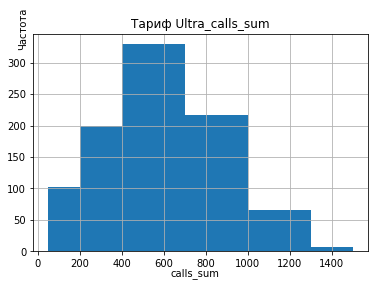

In [124]:
# построение гистограммы
fig, axes = plt.subplots(sharex=True, sharey=True)
fig.text(0.5, 0.04, 'calls_sum', ha='center')
fig.text(0.09, 0.9, 'Частота', va='center', rotation='vertical')
plt.title('Тариф Ultra_calls_sum')
general_concat_ultra['calls_sum'].hist(bins=[50, 200, 400, 700, 1000, 1300, 1500], range=(0, 1700))


Распределение близкое к нормальному, при этом датасет скошен вправо (имеет положительую скошенность). 

По данным гистограммы наиболее часто пользователи тарифа расходуют от 400 до 700 минут в месяц (13-23 минут в день).

Построим диаграмму размаха для оценки характерного разброса данных.

<AxesSubplot:>

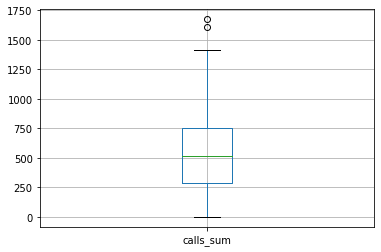

In [125]:
# построение диаграммы размаха
general_concat_ultra.boxplot(column='calls_sum')

По диаграмме размаха видно, что выбросов немного, и они сосредоточены в диапазоне 1600-1700 минут.

Также для оценки разброса применим алгебраические метрики разброса и рассчитаем дисперсию (средний квадрат расстояния между значениями датасета и средним значением), стандартное отклонение (квадратный корень из дисперсии) и выведем среднее значение.

In [126]:
# расчет и вывод среднего количества потраченных абонентом в месяц минут по абонентам тарифа Ultra
ultra_calls_sum_mean = round((general_concat_ultra['calls_sum'].mean()), 1)
print('Среднее количество потраченных абонентом в месяц минут по абонентам тарифа Ultra', ultra_calls_sum_mean, 'мин')

Среднее количество потраченных абонентом в месяц минут по абонентам тарифа Ultra 526.6 мин


In [127]:
# расчет и вывод дисперсии
ultra_calls_sum_var = round(np.var(general_concat_ultra['calls_sum']), 1)
print('Дисперсия потраченных абонентом в месяц минут по абонентам тарифа Ultra', ultra_calls_sum_var)

Дисперсия потраченных абонентом в месяц минут по абонентам тарифа Ultra 100771.2


In [128]:
# расчет и вывод стандартного отклонения
ultra_calls_sum_var_std = round(np.sqrt(ultra_calls_sum_var), 1)
print('Стандартное отклонение по потраченным абонентом в месяц минутам по абонентам тарифа Ultra', ultra_calls_sum_var_std)

Стандартное отклонение по потраченным абонентом в месяц минутам по абонентам тарифа Ultra 317.4


Согласно правилу трех сигм, 99% всех значений находится в пределах +/- 3 стандартных отклонений от среднего значения, соответственно, в данном случае 99% всех значений среднего количества израсходованных минут в месяц находятся в пределах диапазона:

In [129]:
# расчет и вывод диапазона по правилу 3х сигм
print('от', round((ultra_calls_sum_mean -(3*ultra_calls_sum_var_std)), 1), 'до', (ultra_calls_sum_mean + (3*ultra_calls_sum_var_std)))

от -425.6 до 1478.8


Поскольку отрицательным количество израсходованных минут быть не может, левой границей диапазона будет значение 0:

In [130]:
print('от', 0, 'до', (ultra_calls_sum_mean + (3*ultra_calls_sum_var_std)))

от 0 до 1478.8


Проанализируем данные по **количеству сообщений**.

Для этого построим гистограмму для дискретной переменной "количество сообщений", задав количество "корзин".

<AxesSubplot:title={'center':'Тариф Ultra_mess_count'}>

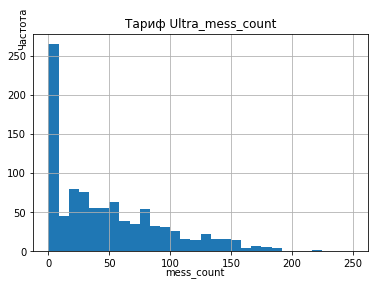

In [131]:
# построение гистограммы
fig, axes = plt.subplots(sharex=True, sharey=True)
fig.text(0.5, 0.04, 'mess_count', ha='center')
fig.text(0.09, 0.9, 'Частота', va='center', rotation='vertical')
plt.title('Тариф Ultra_mess_count')
general_concat_ultra['mess_count'].hist(bins=30, range=(0, 250))

На гистограмме отображено распределение Пуассона, при этом датасет сильно скошен вправо (имеет положительую скошенность), поскольку сообщений может быть отправлено от 0 и до бесконечности. 

По данным гистограммы наиболее часто пользователи тарифа вообще не отправляют сообщения в течение месяца (0 сообщений в месяц).

Построим диаграмму размаха для оценки характерного разброса данных.

<AxesSubplot:>

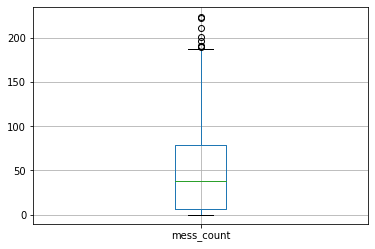

In [132]:
# построение диаграммы размаха
general_concat_ultra.boxplot(column='mess_count')

По диаграмме размаха видно, что выбросов много, и они сосредоточены в диапазоне 180-250 сообщений.

Также для оценки разброса применим алгебраические метрики разброса и рассчитаем дисперсию (средний квадрат расстояния между значениями датасета и средним значением), стандартное отклонение (квадратный корень из дисперсии) и выведем среднее значение.

In [133]:
# расчет и вывод среднего количества отправленных абонентом сообщений в месяц по абонентам тарифа Ultra
ultra_mess_count_mean = round((general_concat_ultra['mess_count'].mean()), 1)
print('Среднее количество отправленных абонентом в месяц сообщений по абонентам тарифа Ultra', ultra_mess_count_mean, 'шт')

Среднее количество отправленных абонентом в месяц сообщений по абонентам тарифа Ultra 49.4 шт


In [134]:
# расчет и вывод дисперсии
ultra_mess_count_var = round(np.var(general_concat_ultra['mess_count']), 1)
print('Дисперсия отправленных абонентом в месяц сообщений по абонентам тарифа Ultra', ultra_mess_count_var)

Дисперсия отправленных абонентом в месяц сообщений по абонентам тарифа Ultra 2282.9


In [135]:
# расчет и вывод стандартного отклонения
ultra_mess_count_var_std = round(np.sqrt(ultra_mess_count_var), 1)
print('Стандартное отклонение по отправленным абонентом в месяц сообщениям по абонентам тарифа Ultra', ultra_mess_count_var_std)

Стандартное отклонение по отправленным абонентом в месяц сообщениям по абонентам тарифа Ultra 47.8


Согласно правилу трех сигм, 99% всех значений находится в пределах +/- 3 стандартных отклонений от среднего значения, соответственно, в данном случае 99% всех значений среднего количества отправленных сообщений в месяц находятся в пределах диапазона:

In [136]:
print('от', 0, 'до', round((ultra_mess_count_mean + (3*ultra_mess_count_var_std))))

от 0 до 193


Проанализируем данные по **количеству интернет трафика**.

Для этого построим гистограмму частот для непрерывной переменной "интернет трафик", задав границы "корзин".

<AxesSubplot:title={'center':'Тариф Ultra_mb_sum'}>

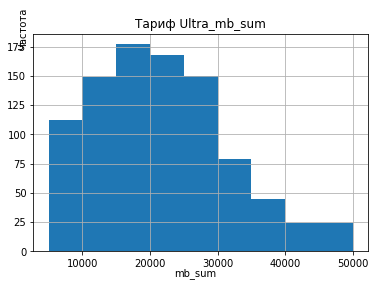

In [137]:
# построение гистограммы
fig, axes = plt.subplots(sharex=True, sharey=True)
fig.text(0.5, 0.04, 'mb_sum', ha='center')
fig.text(0.09, 0.9, 'Частота', va='center', rotation='vertical')
plt.title('Тариф Ultra_mb_sum')
general_concat_ultra['mb_sum'].hist(bins=[5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 50000], range=(0, 50000))

Распределение близкое к нормальному, при этом датасет скошен вправо (имеет положительую скошенность). 

По данным гистограммы наиболее часто пользователи тарифа расходуют от 15 до 24 Гб в месяц (менее 1 Гб в день).

Построим диаграмму размаха для оценки характерного разброса данных.

<AxesSubplot:>

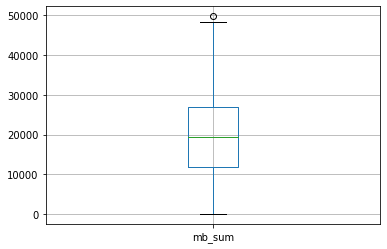

In [138]:
# построение диаграммы размаха
general_concat_ultra.boxplot(column='mb_sum')

По диаграмме размаха видно, что выбросов немного, и они сосредоточены в диапазоне 47 Гб и более.

Также для оценки разброса применим алгебраические метрики разброса и рассчитаем дисперсию (средний квадрат расстояния между значениями датасета и средним значением), стандартное отклонение (квадратный корень из дисперсии) и выведем среднее значение.

In [139]:
# расчет и вывод среднего количества потраченных абонентом в месяц Гб по абонентам тарифа Ultra
ultra_mb_sum_mean = round((general_concat_ultra['mb_sum'].mean()/1024), 1)
print('Среднее количество израсходованных абонентом в месяц Гб по абонентам тарифа Ultra', ultra_mb_sum_mean, 'Гб')

Среднее количество израсходованных абонентом в месяц Гб по абонентам тарифа Ultra 19.0 Гб


In [140]:
# расчет и вывод дисперсии
ultra_mb_sum_var = round(np.var(general_concat_ultra['mb_sum']/1024), 1)
print('Дисперсия израсходованных абонентом в месяц Гб по абонентам тарифа Ultra', ultra_mb_sum_var)

Дисперсия израсходованных абонентом в месяц Гб по абонентам тарифа Ultra 96.9


In [141]:
# расчет и вывод стандартного отклонения
ultra_mb_sum_var_std = round(np.sqrt(ultra_mb_sum_var), 1)
print('Стандартное отклонение по израсходованным абонентом в месяц Гб по абонентам тарифа Ultra', ultra_mb_sum_var_std)

Стандартное отклонение по израсходованным абонентом в месяц Гб по абонентам тарифа Ultra 9.8


Согласно правилу трех сигм, 99% всех значений находится в пределах +/- 3 стандартных отклонений от среднего значения, соответственно, в данном случае 99% всех значений среднего количества израсходованного трафика в месяц находятся в пределах диапазона:

In [142]:
# расчет и вывод диапазона по правилу 3х сигм
print('от', round((ultra_mb_sum_mean -(3*ultra_mb_sum_var_std)), 1), 'до', round((ultra_mb_sum_mean + (3*ultra_mb_sum_var_std)),1))

от -10.4 до 48.4


Поскольку отрицательным количество израсходованных Гб быть не может, левой границей диапазона будет значение 0:

In [143]:
print('от', 0, 'до', round((ultra_mb_sum_mean + (3*ultra_mb_sum_var_std)),1))

от 0 до 48.4


**Особенности тарифа SMART**

Для оценки основных особенностей поведения абонентов тарифа Smart построим сводную таблицу со средними данными по месяцам по сумме потраченных минут разговора, количеству отправленных сообщений, объему израсходованного интернет-трафика и среднему доходу.

In [144]:
# построение сводной таблицы со средними значениями по основным параметрам тарифа по месяцам
general_concat_smart.pivot_table(
    index='month', 
    values=['calls_sum', 'mess_count', 'mb_sum', 'subscr_fee', 'total_cost'], 
    aggfunc=['mean']
).round()

mean                                          
      calls_sum   mb_sum mess_count subscr_fee total_cost
month                                                    
1         204.0   8514.0       18.0        550      721.0
2         299.0  11597.0       24.0        550      828.0
3         390.0  15104.0       32.0        550     1165.0
4         367.0  13462.0       31.0        550      963.0
5         387.0  15805.0       34.0        550     1198.0
6         396.0  15795.0       33.0        550     1204.0
7         408.0  15743.0       34.0        550     1224.0
8         421.0  16611.0       34.0        550     1321.0
9         429.0  16304.0       34.0        550     1250.0
10        426.0  16757.0       34.0        550     1365.0
11        435.0  16896.0       34.0        550     1343.0
12        479.0  18114.0       36.0        550     1579.0

Исходя из данных сводной таблицы, в месяц абоненты тарифа Smart в среднем расходуют:

* от 204 до 479 минут (меньше, чем абоненты тарифа Ultra)
* от 18 до 36 сообщений (меньше, чем абоненты тарифа Ultra)
* от 8 до 18 Гб трафика (меньше, чем абоненты тарифа Ultra)

Средний доход по абонентам тарифа Smart составляет от 721 руб до 1583 руб в месяц (меньше, чем по абонентам тарифа Ultra)

Также выведем общую статистическую информацию о таблице с данными по абонентам тарифа Smart.

In [145]:
# вывод общей статистический информации о таблице
general_concat_smart.describe().round()

,user_id,month,calls_count,calls_sum,mess_count,mb_sum,calls_cost,subscr_fee,mess_cost,int_cost,total_cost
count,2229.0,2229.0,2229.0,2229.0,2229.0,2229.0,2229.0,2229.0,2229.0,2229.0,2229.0
mean,1247.0,8.0,58.0,418.0,33.0,16208.0,125.0,550.0,17.0,598.0,1290.0
std,146.0,3.0,26.0,190.0,28.0,5870.0,254.0,0.0,40.0,737.0,818.0
min,1001.0,1.0,0.0,0.0,0.0,0.0,0.0,550.0,0.0,0.0,550.0
25%,1121.0,6.0,40.0,282.0,10.0,12643.0,0.0,550.0,0.0,0.0,550.0
50%,1239.0,9.0,60.0,422.0,28.0,16507.0,0.0,550.0,0.0,400.0,1023.0
75%,1376.0,11.0,76.0,545.0,51.0,20043.0,135.0,550.0,3.0,1000.0,1750.0
max,1499.0,12.0,198.0,1435.0,143.0,38552.0,2805.0,550.0,279.0,4600.0,6770.0


На основании данных таблицы можно сделать следующие выводы о выборке:
1. В таблице 2229 записей (в 2,25 раза больше, чем записей по тарифу Ultra)
2. Среднее количество потраченных минут - 418 мин, отправленных сообщений - 33 шт, потраченных Гб трафика - 16 Гб
3. Среди абонентов также есть те, кто совсем не использует голосовой и/или интернет трафик, а также те, кто не отправляет сообщения (минимальные значения по этим трем параметрам в выборке равны 0).

Проанализируем данные по **минутам разговора**.

Для этого построим гистограмму частот для непрерывной переменной "минуты разговора", задав границы "корзин".

<AxesSubplot:title={'center':'Тариф Smart_calls_sum'}>

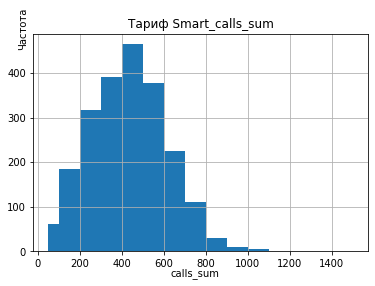

In [146]:
# построение гистограммы
fig, axes = plt.subplots(sharex=True, sharey=True)
fig.text(0.5, 0.04, 'calls_sum', ha='center')
fig.text(0.09, 0.9, 'Частота', va='center', rotation='vertical')
plt.title('Тариф Smart_calls_sum')
general_concat_smart['calls_sum'].hist(bins=[50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500], range=(0, 1500))

Распределение близкое к нормальному, при этом датасет скошен вправо (имеет положительую скошенность). 

По данным гистограммы наиболее часто пользователи тарифа расходуют 500 минут в месяц (16-17 минут в день).

Построим диаграмму размаха для оценки характерного разброса данных.

<AxesSubplot:>

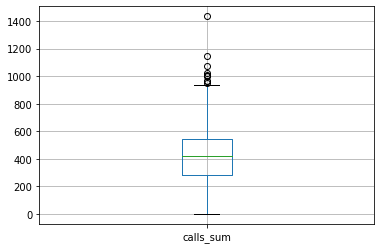

In [147]:
# построение диаграммы размаха
general_concat_smart.boxplot(column='calls_sum')

По диаграмме размаха видно, что выбросов много, и они сосредоточены в диапазоне 900-1400 минут.

Также для оценки разброса применим алгебраические метрики разброса и рассчитаем дисперсию (средний квадрат расстояния между значениями датасета и средним значением), стандартное отклонение (квадратный корень из дисперсии) и выведем среднее значение.

In [148]:
# расчет и вывод среднего количества потраченных абонентом в месяц минут по абонентам тарифа Smart
smart_calls_sum_mean = round((general_concat_smart['calls_sum'].mean()), 1)
print('Среднее количество потраченных абонентом в месяц минут по абонентам тарифа Smart', smart_calls_sum_mean, 'мин')

Среднее количество потраченных абонентом в месяц минут по абонентам тарифа Smart 417.9 мин


In [149]:
# расчет и вывод дисперсии
smart_calls_sum_var = round(np.var(general_concat_smart['calls_sum']), 1)
print('Дисперсия потраченных абонентом в месяц минут по абонентам тарифа Smart', smart_calls_sum_var)

Дисперсия потраченных абонентом в месяц минут по абонентам тарифа Smart 36203.1


In [150]:
# расчет и вывод стандартного отклонения
smart_calls_sum_var_std = round(np.sqrt(smart_calls_sum_var), 1)
print('Стандартное отклонение по потраченным абонентом в месяц минутам по абонентам тарифа Smart', smart_calls_sum_var_std)

Стандартное отклонение по потраченным абонентом в месяц минутам по абонентам тарифа Smart 190.3


Согласно правилу трех сигм, 99% всех значений находится в пределах +/- 3 стандартных отклонений от среднего значения, соответственно, в данном случае 99% всех значений среднего количества израсходованных минут в месяц находятся в пределах диапазона:

In [151]:
# расчет и вывод диапазона по правилу 3х сигм
print('от', round((smart_calls_sum_mean -(3*smart_calls_sum_var_std)), 1), 'до', round((smart_calls_sum_mean + (3*smart_calls_sum_var_std)),1))

от -153.0 до 988.8


Поскольку отрицательным количество израсходованных минут быть не может, левой границей диапазона будет значение 0:

In [152]:
print('от', 0, 'до', round((smart_calls_sum_mean + (3*smart_calls_sum_var_std)),1))

от 0 до 988.8


Проанализируем данные по **количеству сообщений**.

Для этого построим гистограмму для дискретной переменной "количество сообщений", задав количество "корзин".

<AxesSubplot:title={'center':'Тариф Smart_mess_count'}>

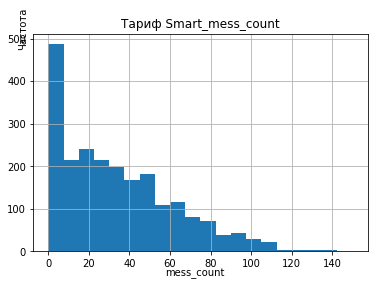

In [153]:
# построение гистограммы
fig, axes = plt.subplots(sharex=True, sharey=True)
fig.text(0.5, 0.04, 'mess_count', ha='center')
fig.text(0.09, 0.9, 'Частота', va='center', rotation='vertical')
plt.title('Тариф Smart_mess_count')
general_concat_smart['mess_count'].hist(bins=20, range=(0, 150))

На гистограмме отображено распределение Пуассона, при этом датасет сильно скошен вправо (имеет положительую скошенность), поскольку сообщений может быть отправлено от 0 и до бесконечности. 

По данным гистограммы наиболее часто пользователи тарифа вообще не отправляют сообщения в течение месяца (0 сообщений в месяц).

Построим диаграмму размаха для оценки характерного разброса данных.

<AxesSubplot:>

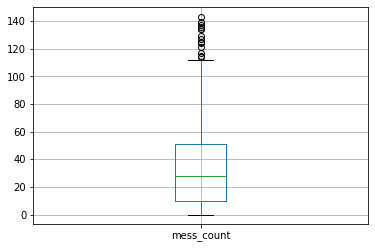

In [154]:
# построение диаграммы размаха
general_concat_smart.boxplot(column='mess_count')

По диаграмме размаха видно, что выбросов много, и они сосредоточены в диапазоне 110-145 сообщений.

Также для оценки разброса применим алгебраические метрики разброса и рассчитаем дисперсию (средний квадрат расстояния между значениями датасета и средним значением), стандартное отклонение (квадратный корень из дисперсии) и выведем среднее значение.

In [155]:
# расчет и вывод среднего количества отправленных абонентом сообщений в месяц по абонентам тарифа Smart
smart_mess_count_mean = round((general_concat_smart['mess_count'].mean()), 1) 
print('Среднее количество отправленных абонентом в месяц сообщений по абонентам тарифа Smart', smart_mess_count_mean, 'шт')

Среднее количество отправленных абонентом в месяц сообщений по абонентам тарифа Smart 33.4 шт


In [156]:
# расчет и вывод дисперсии
smart_mess_count_var = round(np.var(general_concat_smart['mess_count']), 1)
print('Дисперсия отправленных абонентом в месяц сообщений по абонентам тарифа Smart', smart_mess_count_var)

Дисперсия отправленных абонентом в месяц сообщений по абонентам тарифа Smart 796.5


In [157]:
# расчет и вывод стандартного отклонения
smart_mess_count_var_std = round(np.sqrt(smart_mess_count_var), 1)
print('Стандартное отклонение по отправленным абонентом в месяц сообщениям по абонентам тарифа Smart', smart_mess_count_var_std)

Стандартное отклонение по отправленным абонентом в месяц сообщениям по абонентам тарифа Smart 28.2


Согласно правилу трех сигм, 99% всех значений находится в пределах +/- 3 стандартных отклонений от среднего значения, соответственно, в данном случае 99% всех значений среднего количества отправленных сообщений в месяц находятся в пределах диапазона:

In [158]:
print('от', 0, 'до', round((smart_mess_count_mean + (3*smart_mess_count_var_std))))

от 0 до 118


Проанализируем данные по **количеству интернет трафика**.

Для этого построим гистограмму частот для непрерывной переменной "интернет трафик", задав границы "корзин".

<AxesSubplot:title={'center':'Тариф Smart_mb_sum'}>

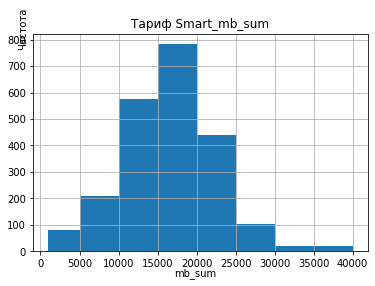

In [159]:
# построение гистограммы
fig, axes = plt.subplots(sharex=True, sharey=True)
fig.text(0.5, 0.04, 'mb_sum', ha='center')
fig.text(0.09, 0.9, 'Частота', va='center', rotation='vertical')
plt.title('Тариф Smart_mb_sum')
general_concat_smart['mb_sum'].hist(bins=[1000, 5000, 10000, 15000, 20000, 25000, 30000, 40000], range=(0, 40000))

Распределение близкое к нормальному, при этом датасет скошен вправо (имеет положительую скошенность). 

По данным гистограммы наиболее часто пользователи тарифа расходуют от 14.5 до 19 Гб в месяц (менее 1 Гб в день).

Построим диаграмму размаха для оценки характерного разброса данных.

<AxesSubplot:>

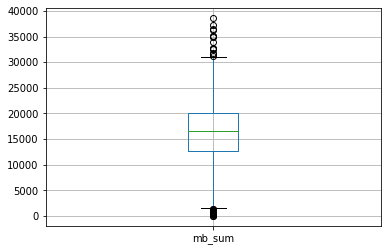

In [160]:
# построение диаграммы размаха
general_concat_smart.boxplot(column='mb_sum')

По диаграмме размаха видно, что выбросов много, и они сосредоточены в диапазоне 0-2 Гб и 31-38 Гб.

Также для оценки разброса применим алгебраические метрики разброса и рассчитаем дисперсию (средний квадрат расстояния между значениями датасета и средним значением), стандартное отклонение (квадратный корень из дисперсии) и выведем среднее значение.

In [161]:
# расчет и вывод среднего количества потраченных абонентом в месяц Гб по абонентам тарифа Smart
smart_mb_sum_mean = round((general_concat_smart['mb_sum'].mean()/1024), 1)
print('Среднее количество израсходованных абонентом в месяц Гб по абонентам тарифа Smart', smart_mb_sum_mean, 'Гб')

Среднее количество израсходованных абонентом в месяц Гб по абонентам тарифа Smart 15.8 Гб


In [162]:
# расчет и вывод дисперсии
smart_mb_sum_var = round(np.var(general_concat_smart['mb_sum']/1024), 1)
print('Дисперсия израсходованных абонентом в месяц Гб по абонентам тарифа Smart', smart_mb_sum_var)

Дисперсия израсходованных абонентом в месяц Гб по абонентам тарифа Smart 32.9


In [163]:
# расчет и вывод стандартного отклонения
smart_mb_sum_var_std = round(np.sqrt(smart_mb_sum_var), 1)
print('Стандартное отклонение по израсодованным абонентом в месяц Гб по абонентам тарифа Smart', smart_mb_sum_var_std)

Стандартное отклонение по израсодованным абонентом в месяц Гб по абонентам тарифа Smart 5.7


Согласно правилу трех сигм, 99% всех значений находится в пределах +/- 3 стандартных отклонений от среднего значения, соответственно, в данном случае 99% всех значений среднего количества израсходованного трафика в месяц находятся в пределах диапазона:

In [164]:
# расчет и вывод диапазона по правилу 3х сигм
print('от', round((smart_mb_sum_mean -(3*smart_mb_sum_var_std)), 1), 'до', round((smart_mb_sum_mean + (3*smart_mb_sum_var_std)),1))

от -1.3 до 32.9


Поскольку отрицательным количество израсходованных Гб быть не может, левой границей диапазона будет значение 0:

In [165]:
print('от', 0, 'до', round((smart_mb_sum_mean + (3*smart_mb_sum_var_std)),1))

от 0 до 32.9


<div style="border:solid blue 2px; padding: 20px"> 

**Вывод**  

Проведен анализ данных выборки для описания поведения абонентов каждого тарифного плана.

1. *Тариф Ultra*
    
Исходя из данных сводной таблицы, в месяц абоненты тарифа Ultra в среднем расходуют:
+ от 297 до 593 минут
+ от 22 до 61 сообщения
+ от 12 до 21 Гб трафика
Средний доход по абонентам тарифа Ultra составляет от 1950 руб до 2139 руб в месяц

На основании данных таблицы можно сделать следующие выводы о выборке:

В таблице 985 записей
Среднее количество потраченных минут - 527 мин, отправленных сообщений - 49 шт, потраченных Гб трафика - 19 Гб
В выборке есть абоненты, совсем не использующие голосовой и/или интернет трафик, а также те, кто не отправляет сообщения 
(минимальные значения по этим трем параметрам в выборке равны 0).

Звонки:
    
Распределение близкое к нормальному, при этом датасет скошен вправо (имеет положительую скошенность).
По данным гистограммы наиболее часто пользователи тарифа расходуют от 400 до 700 минут в месяц (13-23 минут в день).
Выбросов немного, и они сосредоточены в диапазоне 1600-1700 минут.
Среднее - 526.6, дисперсия - 100771.2, стандартное отклонение - 317.4

Сообщения:
    
Распределение Пуассона, при этом датасет сильно скошен вправо (имеет положительую скошенность).
По данным гистограммы наиболее часто пользователи тарифа вообще не отправляют сообщения в течение месяца (0 сообщений в месяц).
Выбросов много, и они сосредоточены в диапазоне 180-250 сообщений.
Среднее - 49.4, дисперсия - 2282.9, стандартное отклонение - 47.8

Интернет-трафик:
    
Распределение близкое к нормальному, при этом датасет скошен вправо (имеет положительую скошенность).
По данным гистограммы наиболее часто пользователи тарифа расходуют от 15 до 24 Гб в месяц (менее 1 Гб в день).
Выбросов немного, и они сосредоточены в диапазоне 47 Гб и более.
Среднее - 19.0, дисперсия - 97.1, стандартное отклонение - 9.9

2. *Тариф Smart*
    
Исходя из данных сводной таблицы, в месяц абоненты тарифа Smart в среднем расходуют:
+ от 204 до 479 минут (меньше, чем абоненты тарифа Ultra)
+ от 18 до 36 сообщений (меньше, чем абоненты тарифа Ultra)
+ от 8 до 18 Гб трафика (меньше, чем абоненты тарифа Ultra)
Средний доход по абонентам тарифа Smart составляет от 721 руб до 1583 руб в месяц (меньше, чем по абонентам тарифа Ultra)

На основании данных таблицы можно сделать следующие выводы о выборке:

В таблице 2229 записей (в 2,25 раза больше, чем записей по тарифу Ultra)
Среднее количество потраченных минут - 418 мин, отправленных сообщений - 33 шт, потраченных Гб трафика - 16 Гб
Среди абонентов также есть те, кто совсем не использует голосовой и/или интернет трафик, а также те, кто не отправляет 
сообщения (минимальные значения по этим трем параметрам в выборке равны 0).

Звонки:
    
Распределение близкое к нормальному, при этом датасет скошен вправо (имеет положительую скошенность).
По данным гистограммы наиболее часто пользователи тарифа расходуют 500 минут в месяц (16-17 минут в день).
Выбросов много, и они сосредоточены в диапазоне 900-1400 минут.
Среднее - 417.9, дисперсия - 36203.1, стандартное отклонение - 190.3

Сообщения:
    
Распределение Пуассона, при этом датасет сильно скошен вправо (имеет положительую скошенность).
По данным гистограммы наиболее часто пользователи тарифа вообще не отправляют сообщения в течение месяца (0 сообщений в месяц).
Выбросов много, и они сосредоточены в диапазоне 110-145 сообщений.
Среднее - 33.4, дисперсия - 796.5, стандартное отклонение - 28.2

Интернет-трафик:
    
Распределение близкое к нормальному, при этом датасет скошен вправо (имеет положительую скошенность).
По данным гистограммы наиболее часто пользователи тарифа расходуют от 14.5 до 19 Гб в месяц (менее 1 Гб в день).
Выбросов много, и они сосредоточены в диапазоне 0-2 Гб и 31-38 Гб.
Среднее - 15.8, дисперсия - 32.9, стандартное отклонение - 5.7

</div>

Соберем таблицы с данными по двум тарифам для удобства сравнения.

**Тариф Ultra**

In [166]:
Ultra_Data = {
'Type_traf':['Звонки', 'Сообщения', 'Интернет'],
'Mean':[526.6,49.4,19],
'Variance':[100771.2,2282.9,96.9],
'STD':[317.4,47.8,9.8],
'Range':['от 0 до 1478.8', 'от 0 до 193', 'от 0 до 48.4']
}
result = pd.DataFrame(Ultra_Data)
display(result)

,Type_traf,Mean,Variance,STD,Range
0,Звонки,526.6,100771.2,317.4,от 0 до 1478.8
1,Сообщения,49.4,2282.9,47.8,от 0 до 193
2,Интернет,19.0,96.9,9.8,от 0 до 48.4


**Тариф Smart**

In [167]:
Smart_Data = {
'Type_traf':['Звонки', 'Сообщения', 'Интернет'],
'Mean':[417.9, 33.4, 15.8],
'Variance':[36203.1, 796.5, 32.9],
'STD':[190.3, 28.2, 5.7],
'Range':['от 0 до 988.8', 'от 0 до 118', 'от 0 до 32.9']
}
result = pd.DataFrame(Smart_Data)
display(result)

,Type_traf,Mean,Variance,STD,Range
0,Звонки,417.9,36203.1,190.3,от 0 до 988.8
1,Сообщения,33.4,796.5,28.2,от 0 до 118
2,Интернет,15.8,32.9,5.7,от 0 до 32.9


**Calls**

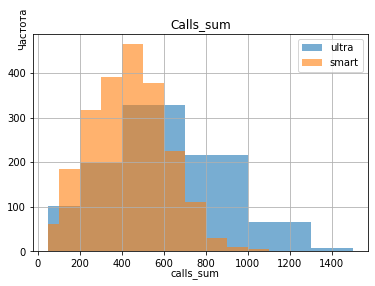

In [168]:
fig, axes = plt.subplots(sharex=True, sharey=True)
fig.text(0.5, 0.04, 'calls_sum', ha='center')
fig.text(0.09, 0.9, 'Частота', va='center', rotation='vertical')
plt.title('Calls_sum')
general_concat_ultra['calls_sum'].hist(alpha = 0.6, bins=[50, 200, 400, 700, 1000, 1300, 1500], range=(0, 1700))
general_concat_smart['calls_sum'].hist(alpha = 0.6, bins=[50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500], range=(0, 1500))
plt.legend(['ultra', 'smart'])
plt.show()

**Messages**

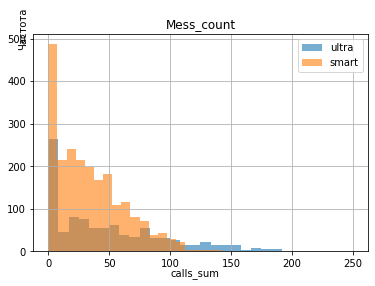

In [169]:
fig, axes = plt.subplots(sharex=True, sharey=True)
fig.text(0.5, 0.04, 'calls_sum', ha='center')
fig.text(0.09, 0.9, 'Частота', va='center', rotation='vertical')
plt.title('Mess_count')
general_concat_ultra['mess_count'].hist(alpha = 0.6, bins=30, range=(0, 250))
general_concat_smart['mess_count'].hist(alpha = 0.6, bins=20, range=(0, 150))
plt.legend(['ultra', 'smart'])
plt.show()

**Internet**

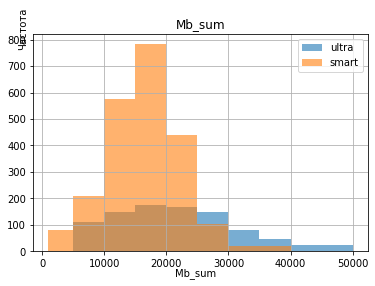

In [170]:
fig, axes = plt.subplots(sharex=True, sharey=True)
fig.text(0.5, 0.04, 'Mb_sum', ha='center')
fig.text(0.09, 0.9, 'Частота', va='center', rotation='vertical')
plt.title('Mb_sum')
general_concat_ultra['mb_sum'].hist(alpha = 0.6, bins=[5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 50000], range=(0, 50000))
general_concat_smart['mb_sum'].hist(alpha = 0.6, bins=[1000, 5000, 10000, 15000, 20000, 25000, 30000, 40000], range=(0, 40000))
plt.legend(['ultra', 'smart'])
plt.show()

**Total cost**

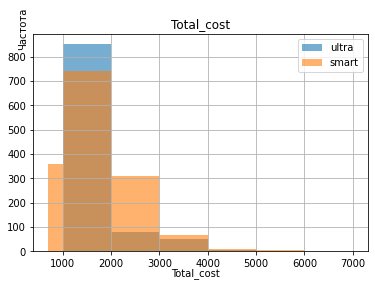

In [171]:
fig, axes = plt.subplots(sharex=True, sharey=True)
fig.text(0.5, 0.04, 'Total_cost', ha='center')
fig.text(0.09, 0.9, 'Частота', va='center', rotation='vertical')
plt.title('Total_cost')
general_concat_ultra['total_cost'].hist(alpha = 0.6, bins=[700, 1000, 2000, 3000, 4000, 5000], range=(0, 5000))
general_concat_smart['total_cost'].hist(alpha = 0.6, bins=[700, 1000, 2000, 3000, 4000, 5000, 6000, 7000], range=(0, 7000))
plt.legend(['ultra', 'smart'])
plt.show()

## Шаг 4. Проверка гипотез

Сформулируем пары гипотез (нулевую и альтернативную) для проверки предположений:
1.	средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
2.	средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Первая пара гипотез будет звучать так:

**H₀**: Средняя выручка по пользователям тарифа «Ультра» равна средней выручке по пользователям тарифа «Смарт»

**H₁**: Средняя выручка по пользователям тарифа «Ультра» не равна средней выручке по пользователям тарифа «Смарт»

Вторая пара гипотез будет звучать так:

**H₀**: Средняя выручка по пользователям из Москвы равна выручке от пользователей из других регионов

**H₁**: Средняя выручка по пользователям из Москвы не равна выручке от пользователей из других регионов

Первая гипотеза H₀ всегда формулируется так, чтобы использовать знак равенства. Альтернативная гипотеза H₁ формулируется, исходя из нулевой гипотезы. Если полученные в результате проверки данные не будут противоречить гипотезе H₀, это будет означать, что мы ее не отвергнем. Если же окажется, что получить такие данные в рамках этой гипотезы вряд ли возможно, у нас появляется основание отбросить эту гипотезу и рассмотреть альтернативную гипотезу H₁. 

Если гипотеза H₀ верна, мы будем наблюдать нормальное распределение вокруг интересующего нас параметра — среднего. Дисперсию, или стандартное отклонение, мы оценим по данным выборки.

Уровень значимости (суммарная вероятность того, что измеренное эмпирически значение окажется далеко от среднего) установим на отметке 0,05. Если наблюдаемое на выборке значение попадает в эту зону, вероятность такого события при верной нулевой гипотезе признаётся слишком малой, значит, у нас есть основание отвергнуть нулевую гипотезу. Когда значение попадает в зону «Не твергаем H₀», то оснований отвергать нулевую гипотезу нет. Считаем, что эмпирически полученные данные не противоречат нулевой гипотезе.

Для работы над гипотезами перезапишем индексацию у таблиц с данными по тарифу Ultra и тарифу Smart, чтобы далее нам было удобнее обогатить эти таблицы данными о городе абонента.

In [172]:
# переиндексация таблицы с данными по тарифу Ultra
general_concat_ultra.reset_index(drop=True).head()

,user_id,month,tariff,calls_count,calls_sum,mess_count,mb_sum,calls_cost,subscr_fee,mess_cost,int_cost,total_cost
0,1000,5,ultra,22.0,159.0,22.0,2253.49,0.0,1950,0.0,0.0,1950.0
1,1000,6,ultra,43.0,172.0,60.0,23233.77,0.0,1950,0.0,0.0,1950.0
2,1000,7,ultra,47.0,340.0,75.0,14003.64,0.0,1950,0.0,0.0,1950.0
3,1000,8,ultra,52.0,408.0,81.0,14055.93,0.0,1950,0.0,0.0,1950.0
4,1000,9,ultra,58.0,466.0,57.0,14568.91,0.0,1950,0.0,0.0,1950.0


In [173]:
# переиндексация таблицы с данными по тарифу Smart
general_concat_smart.reset_index(drop=True).head()

,user_id,month,tariff,calls_count,calls_sum,mess_count,mb_sum,calls_cost,subscr_fee,mess_cost,int_cost,total_cost
0,1001,11,smart,59.0,430.0,0.0,18429.34,0.0,550,0.0,600.0,1150.0
1,1001,12,smart,63.0,414.0,0.0,14036.66,0.0,550,0.0,0.0,550.0
2,1002,6,smart,15.0,117.0,4.0,10856.82,0.0,550,0.0,0.0,550.0
3,1002,7,smart,26.0,214.0,11.0,17580.10,0.0,550,0.0,600.0,1150.0
4,1002,8,smart,42.0,289.0,13.0,20319.26,0.0,550,0.0,1000.0,1550.0


Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применим метод scipy.stats.ttest_ind().

In [174]:
# импорт библиотеки scipy
from scipy import stats as st

**Первая пара гипотез**

**H₀**: Средняя выручка по пользователям тарифа «Ультра» равна средней выручке по пользователям тарифа «Смарт»

**H₁**: Средняя выручка по пользователям тарифа «Ультра» не равна средней выручке по пользователям тарифа «Смарт»

Применим метод scipy.stats.ttest_ind() для определения вероятности равенства средней выручки по абонентам двух тарифов.

In [175]:
# применение метода
alpha = .05
results = st.ttest_ind(
    general_concat_ultra['total_cost'], 
    general_concat_smart['total_cost'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.4229814360764067e-160
Отвергаем нулевую гипотезу


Поскольку вероятность получить такие события, которые сформулированы в нулевой гипотезе, крайне мала (меньше уровня значимости), мы вынуждены отвергнуть эту гипотезу.

**Вторая пара гипотез**

**H₀**: Средняя выручка по пользователям из Москвы равна выручке от пользователей из других регионов

**H₁**: Средняя выручка по пользователям из Москвы не равна выручке от пользователей из других регионов

Для проведения работы над второй парой гипотез, объединим таблицы по абонентам тарифов и сделаем переиндексацию.

In [176]:
# объединение таблиц с переиндексацией
smart_ultra_city = pd.concat(
    [general_concat_ultra, general_concat_smart], axis=0, join='outer', ignore_index=True).reset_index(drop=True)

Проверим, все ли строки попали в объединенную таблицу.

In [177]:
# построение сводной таблицы по тарифу для проверки количества строк после объединения
smart_ultra_city.pivot_table(index='tariff', values='user_id', aggfunc='count')

,user_id
tariff,
smart,2229
ultra,985


Обогатим таблицу с данными по тарифам данными о городе пользователя из таблицы df_users.

In [178]:
# добавление в таблицу по тарифам данных о городе пользователя
smart_ultra_city['city'] = smart_ultra_city['user_id'].map(df_users.set_index('user_id')['city'])

Визуально оценим результат.

In [179]:
# вывод первых 10 строк дополненной таблицы
smart_ultra_city.head(10)

,user_id,month,tariff,calls_count,calls_sum,mess_count,mb_sum,calls_cost,subscr_fee,mess_cost,int_cost,total_cost,city
0,1000,5,ultra,22.0,159.0,22.0,2253.49,0.0,1950,0.0,0.0,1950.0,Краснодар
1,1000,6,ultra,43.0,172.0,60.0,23233.77,0.0,1950,0.0,0.0,1950.0,Краснодар
2,1000,7,ultra,47.0,340.0,75.0,14003.64,0.0,1950,0.0,0.0,1950.0,Краснодар
3,1000,8,ultra,52.0,408.0,81.0,14055.93,0.0,1950,0.0,0.0,1950.0,Краснодар
4,1000,9,ultra,58.0,466.0,57.0,14568.91,0.0,1950,0.0,0.0,1950.0,Краснодар
5,1000,10,ultra,57.0,350.0,73.0,14702.49,0.0,1950,0.0,0.0,1950.0,Краснодар
6,1000,11,ultra,43.0,338.0,58.0,14756.47,0.0,1950,0.0,0.0,1950.0,Краснодар
7,1000,12,ultra,46.0,333.0,70.0,9817.61,0.0,1950,0.0,0.0,1950.0,Краснодар
8,1003,8,ultra,55.0,380.0,37.0,8565.21,0.0,1950,0.0,0.0,1950.0,Москва
9,1003,9,ultra,134.0,961.0,91.0,12468.87,0.0,1950,0.0,0.0,1950.0,Москва


Город успешно добавлен в новую колонку city.

Разделим новую таблицу по колонке город на "Москву" и остальные города.

In [180]:
# формирование новой таблицы только с пользователями Москвы
smart_ultra_city_moscow = smart_ultra_city.query('city =="Москва"').reset_index(drop=True)

In [181]:
# визуальная проверка результата
smart_ultra_city_moscow.head()

,user_id,month,tariff,calls_count,calls_sum,mess_count,mb_sum,calls_cost,subscr_fee,mess_cost,int_cost,total_cost,city
0,1003,8,ultra,55.0,380.0,37.0,8565.21,0.0,1950,0.0,0.0,1950.0,Москва
1,1003,9,ultra,134.0,961.0,91.0,12468.87,0.0,1950,0.0,0.0,1950.0,Москва
2,1003,10,ultra,108.0,855.0,83.0,14768.14,0.0,1950,0.0,0.0,1950.0,Москва
3,1003,11,ultra,115.0,824.0,94.0,11356.89,0.0,1950,0.0,0.0,1950.0,Москва
4,1003,12,ultra,108.0,802.0,75.0,10121.53,0.0,1950,0.0,0.0,1950.0,Москва


In [182]:
# формирование новой таблицы с пользователями других городов
smart_ultra_city_other = smart_ultra_city.query('city !="Москва"').reset_index(drop=True)

In [183]:
# визуальная проверка результата
smart_ultra_city_other.head()

,user_id,month,tariff,calls_count,calls_sum,mess_count,mb_sum,calls_cost,subscr_fee,mess_cost,int_cost,total_cost,city
0,1000,5,ultra,22.0,159.0,22.0,2253.49,0.0,1950,0.0,0.0,1950.0,Краснодар
1,1000,6,ultra,43.0,172.0,60.0,23233.77,0.0,1950,0.0,0.0,1950.0,Краснодар
2,1000,7,ultra,47.0,340.0,75.0,14003.64,0.0,1950,0.0,0.0,1950.0,Краснодар
3,1000,8,ultra,52.0,408.0,81.0,14055.93,0.0,1950,0.0,0.0,1950.0,Краснодар
4,1000,9,ultra,58.0,466.0,57.0,14568.91,0.0,1950,0.0,0.0,1950.0,Краснодар


Применим метод scipy.stats.ttest_ind() для определения вероятности равенства средней выручки по абонентам двух выборок (Москва и не Москва).

In [184]:
# применение метода
alpha = .05
results = st.ttest_ind(
    smart_ultra_city_moscow['total_cost'], 
    smart_ultra_city_other['total_cost'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5440152911670224
Не получилось отвергнуть нулевую гипотезу


Поскольку вероятность получить такие события, которые сформулированы в нулевой гипотезе, превышает уровень значимости, нулевая гипотеза не может быть отвергнута.

Пользуясь тем, что выборки небольшие, и мы можем посчитать их реальное среднее, проверим правдивость гипотезы "Средняя выручка по пользователям из Москвы равна выручке от пользователей из других регионов" эмпирически.

In [185]:
# вывод среднемесячного значения по выручке по абонентам Москвы
round(smart_ultra_city_moscow['total_cost'].mean(),1)

1546.7

In [186]:
# вывод среднемесячного значения по выручке по абонентам других городов
round(smart_ultra_city_other['total_cost'].mean(),1)

1524.9

Действительно, средние значения двух выборок практически равны.

<div style="border:solid blue 2px; padding: 20px"> 

**Вывод**  

Для проверки предположений о наличии различий между средними выручками по абонентам разных тарифов, а также средними выручками абонентов Москвы и других городов, были сформулированы две пары гипотез:
1. H₀: Средняя выручка по пользователям тарифа «Ультра» равна средней выручке по пользователям тарифа «Смарт»
   
   H₁: Средняя выручка по пользователям тарифа «Ультра» не равна средней выручке по пользователям тарифа «Смарт»
    

2. H₀: Средняя выручка по пользователям из Москвы равна выручке от пользователей из других регионов
   
   H₁: Средняя выручка по пользователям из Москвы не равна выручке от пользователей из других регионов
    
    
Для их проверки  был применен метод scipy.stats.ttest_ind() при уровне значимости 0,05, в результате чего
в первой паре нулевая гипотеза была отвергнута, а во второй паре гипотез нулевая гипотеза не была отвергнута.

</div>

## Шаг 5. Вывод

<div style="border:solid blue 2px; padding: 20px"> 

**Вывод**  

Целью исследования было проанализировать данные и определить, какой тариф является наиболее выгодным для оператора.

Для этого были проделаны следующие шаги:
    
*1. Шаг 1_Обзор данных*

    Были открыты все 5 таблиц с данными, данные были проверены на корретность типов данных, наличие ошибок в данных, наличие пропусков и дуликатов, необходимости переименования столбцов. По резальтатам проверки был исправлен тип данных во всех колонках с датами, удалена лишняя колонка "Unnamed: 0" в таблице "df_internet", заменены отсутствующие значения в таблице "df_users" в колонке "churn_date" на 0. Дубликатов обнаружено не было, переименование столбцов не потребовалось.
    

*2. Шаг 2_Подготовка данных*
    
    Была проведена подготовка и предобработка данных в каждой таблице: изменены типы данных, заменены значения Nan на 0, удалена колонка Unnamed:0, округлены в бОльшую сторону данные в колонке mb_used по правилам тарификации, округлены в бОльшую сторону значения в колонке duration по правилам тарификации, проверены данные на наличие ошибок (ошибки не обнаружены).

Также по каждому пользователю каждого тарифа по месяцам подсчитаны:

* количество сделанных звонков и израсходованных минут разговора;
* количество отправленных сообщений;
* объем израсходованного интернет-трафика;
* помесячная выручка.

    
*3. Шаг 3_Анализ данных*  
    
    Проведен анализ поведения абонентов тарифов Ultra и Smart. 
    
    В месяц абоненты тарифа Ultra в среднем расходуют:
+ от 297 до 593 минут
+ от 22 до 61 сообщения
+ от 12 до 21 Гб трафика

    Средний доход по абонентам тарифа Ultra составляет от 1950 руб до 2139 руб в месяц
    
    В месяц абоненты тарифа Smart в среднем расходуют:
  
    
+ от 204 до 479 минут (меньше, чем абоненты тарифа Ultra)
+ от 18 до 36 сообщений (меньше, чем абоненты тарифа Ultra)
+ от 8 до 18 Гб трафика (меньше, чем абоненты тарифа Ultra)

    Средний доход по абонентам тарифа Smart составляет от 721 руб до 1583 руб в месяц (меньше, чем по абонентам тарифа Ultra)
   
Звонки:

    Тариф Ultra
Распределение близкое к нормальному, при этом датасет скошен вправо (имеет положительую скошенность).
По данным гистограммы наиболее часто пользователи тарифа расходуют от 400 до 700 минут в месяц (13-23 минут в день).
Выбросов немного, и они сосредоточены в диапазоне 1600-1700 минут.
Среднее - 526.6, дисперсия - 100771.2, стандартное отклонение - 317.4

Сообщения:
    
    Тариф Ultra
Распределение Пуассона, при этом датасет сильно скошен вправо (имеет положительую скошенность).
По данным гистограммы наиболее часто пользователи тарифа вообще не отправляют сообщения в течение месяца (0 сообщений в месяц).
Выбросов много, и они сосредоточены в диапазоне 180-250 сообщений.
Среднее - 49.4, дисперсия - 2282.9, стандартное отклонение - 47.8

Интернет-трафик:
    
    Тариф Ultra
Распределение близкое к нормальному, при этом датасет скошен вправо (имеет положительую скошенность).
По данным гистограммы наиболее часто пользователи тарифа расходуют от 15 до 24 Гб в месяц (менее 1 Гб в день).
Выбросов немного, и они сосредоточены в диапазоне 47 Гб и более.
Среднее - 19.0, дисперсия - 97.1, стандартное отклонение - 9.9

Звонки:
    
    Тариф Smart
Распределение близкое к нормальному, при этом датасет скошен вправо (имеет положительую скошенность).
По данным гистограммы наиболее часто пользователи тарифа расходуют 500 минут в месяц (16-17 минут в день).
Выбросов много, и они сосредоточены в диапазоне 900-1400 минут.
Среднее - 417.9, дисперсия - 36203.1, стандартное отклонение - 190.3

Сообщения:
   
    Тариф Smart
Распределение Пуассона, при этом датасет сильно скошен вправо (имеет положительую скошенность).
По данным гистограммы наиболее часто пользователи тарифа вообще не отправляют сообщения в течение месяца (0 сообщений в месяц).
Выбросов много, и они сосредоточены в диапазоне 110-145 сообщений.
Среднее - 33.4, дисперсия - 796.5, стандартное отклонение - 28.2

Интернет-трафик:
    
    Тариф Smart
Распределение близкое к нормальному, при этом датасет скошен вправо (имеет положительую скошенность).
По данным гистограммы наиболее часто пользователи тарифа расходуют от 14.5 до 19 Гб в месяц (менее 1 Гб в день).
Выбросов много, и они сосредоточены в диапазоне 0-2 Гб и 31-38 Гб.
Среднее - 15.8, дисперсия - 32.9, стандартное отклонение - 5.7

    
*4. Шаг 4_Проверка гипотез*
    
     Были сформулированы две пары гипотез:

1. H₀: Средняя выручка по пользователям тарифа «Ультра» равна средней выручке по пользователям тарифа «Смарт»

   H₁: Средняя выручка по пользователям тарифа «Ультра» не равна средней выручке по пользователям тарифа «Смарт»
  
    
2. H₀: Средняя выручка по пользователям из Москвы равна выручке от пользователей из других регионов

   H₁: Средняя выручка по пользователям из Москвы не равна выручке от пользователей из других регионов

Для их проверки был применен метод scipy.stats.ttest_ind() при уровне значимости 0,05, в результате чего в первой паре нулевая гипотеза была отвергнута, а во второй паре гипотез нулевая гипотеза не была отвергнута.
    
**Таким образом, несмотря на суммарную бОльшую выручку с тарифа Smart в данной выборке за счет бОльшего числа записей по абонентам этого тарифа, наиболее выгоден для компании тариф Ultra с более высоким средним и медианой по выручке. Задача маркетинга и продаж - повысить подключения к этому тарифу.**
</div>